##### Name - Shunottara Alhat


# Assignment 7 Clustering - Q1. Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.  Draw the inferences from the clusters obtained.
 

In [1]:
#pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples , silhouette_score , calinski_harabasz_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer
from sklearn.datasets import make_blobs
from itertools import product

import matplotlib.pyplot as plt
import matplotlib.cm as CM
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')


# Data display customization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)


In [3]:
Airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name ='data')
Airlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      Award?  
0     0       
1     0       
2     0       
3     0       
4     1       
...  ..       
3994  1       
3995  1       
3996  1       
3997  0       
3998  0       

[3999 rows x 12 columns]

In [4]:
Airlines.rename(columns = {'ID#':'ID','Award?':'Award'},inplace = True)

Airlines.set_index('ID',inplace = True)
Airlines

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  
ID           
1     0      
2     0      
3     0      
4     0      
5     1      
...  ..      
4017  1      
4018  1      
4019  1      
4020  0      
4021  0      

[3999 rows x 11 columns]

### Descriptive  

In [5]:
Airlines.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

#### Info 

In [6]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


#### Unique 

In [7]:
print("Unique_CC1",Airlines.cc1_miles.unique())
print("Unique_CC2",Airlines.cc2_miles.unique())
print("Unique_CC3",Airlines.cc3_miles.unique())

Unique_CC1 [1 4 3 2 5]
Unique_CC2 [1 2 3]
Unique_CC3 [1 3 2 4 5]


### Missing Values 

In [8]:
null_count_col = Airlines.isnull().sum().value_counts(ascending=False)
null_count_col

0    11
dtype: int64

In [9]:
null_percent_col = (Airlines.isnull().sum() * 100 / len(Airlines)).value_counts(ascending=False)
null_percent_col

0.0    11
dtype: int64

In [10]:
null_count_row = Airlines.isnull().sum(axis=1).value_counts(ascending=False)
null_count_row

0    3999
dtype: int64

In [11]:
null_percent_row = (Airlines.isnull().sum(axis=1) * 100 / len(Airlines)).value_counts(ascending=False)
null_percent_row

0.0    3999
dtype: int64

In [12]:
Airlines.isnull()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     False    False       False      False      False      False         
2     False    False       False      False      False      False         
3     False    False       False      False      False      False         
4     False    False       False      False      False      False         
5     False    False       False      False      False      False         
...     ...      ...         ...        ...        ...        ...         
4017  False    False       False      False      False      False         
4018  False    False       False      False      False      False         
4019  False    False       False      False      False      False         
4020  False    False       False      False      False      False         
4021  False    False       False      False      False      False         

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     False        False              False            False               
2     False        False              False            False               
3     False        False              False            False               
4     False        False              False            False               
5     False        False              False            False               
...     ...          ...                ...              ...               
4017  False        False              False            False               
4018  False        False              False            False               
4019  False        False              False            False               
4020  False        False              False            False               
4021  False        False              False            False               

      Award  
ID           
1     False  
2     False  
3     False  
4     False  
5     False  
...     ...  
4017  False  
4018  False  
4019  False  
4020  False  
4021  False  

[3999 rows x 11 columns]

### Duplicates Value 

In [13]:
Airlines.duplicated()

ID
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Length: 3999, dtype: bool

# Explorary Data Analysis

<AxesSubplot:xlabel='ID'>

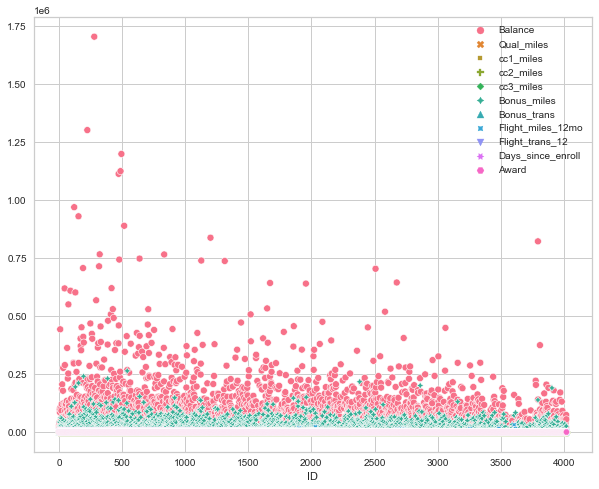

In [14]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = Airlines , alpha = 1)

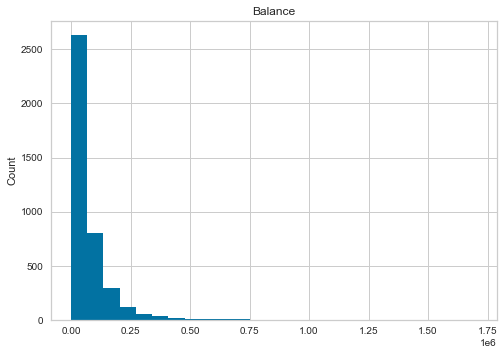

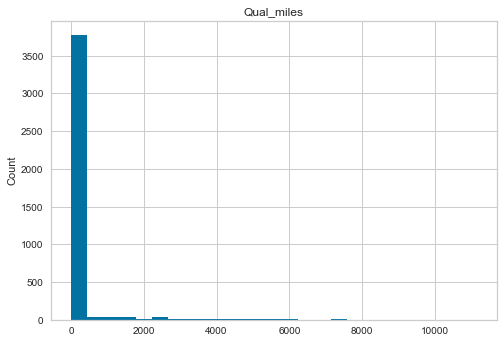

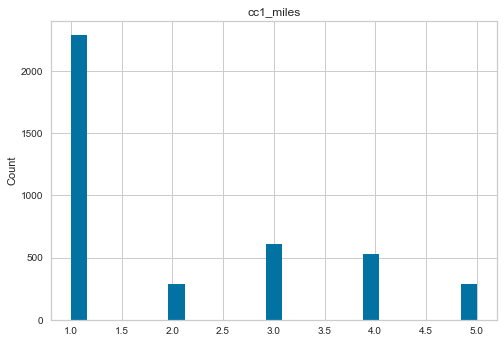

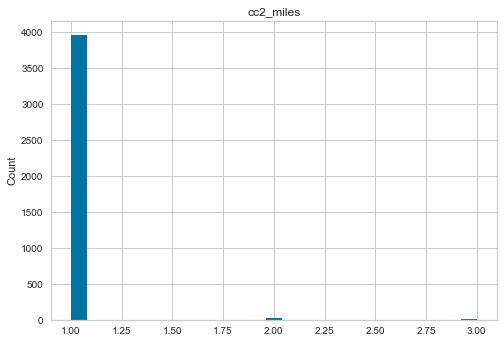

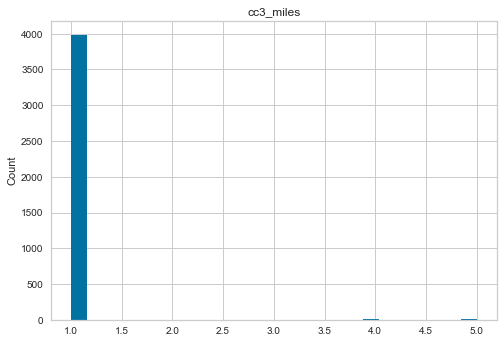

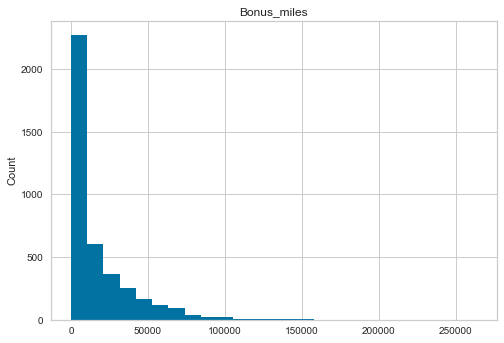

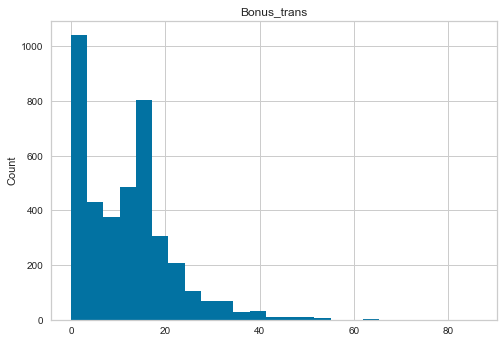

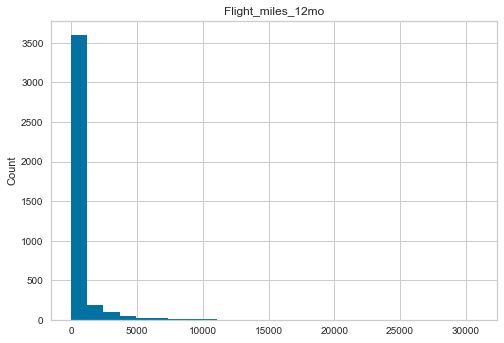

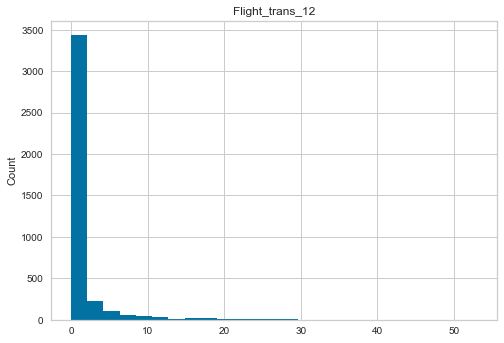

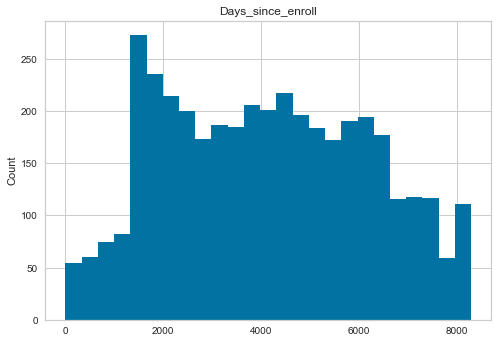

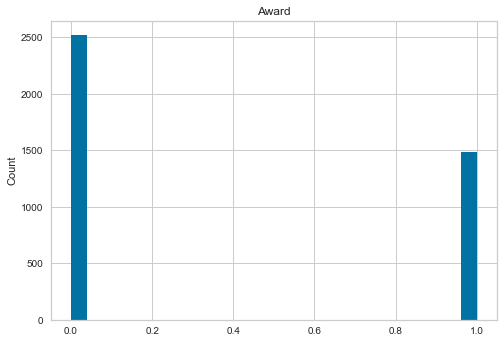

In [15]:
for feature in Airlines.columns:
    Airlines = Airlines.copy()
    Airlines[feature].hist(bins = 25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


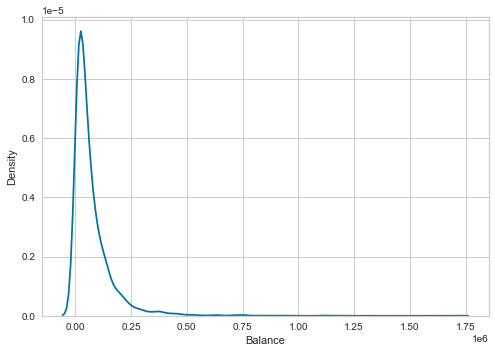

Qual_miles


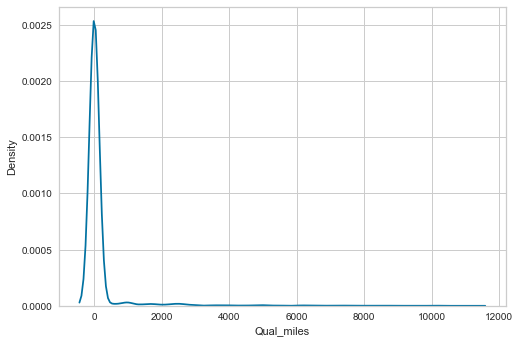

cc1_miles


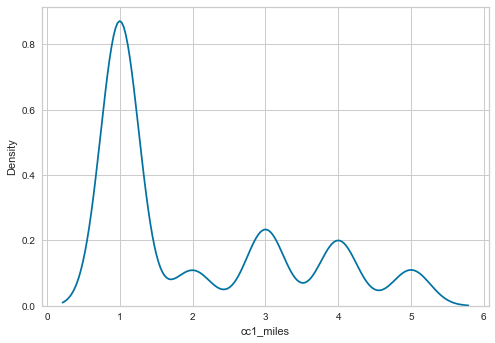

cc2_miles


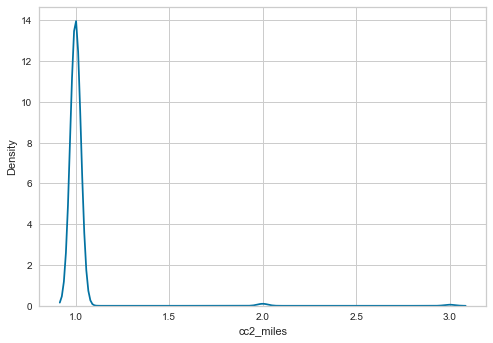

cc3_miles


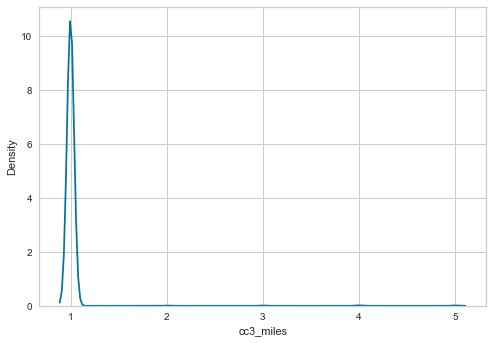

Bonus_miles


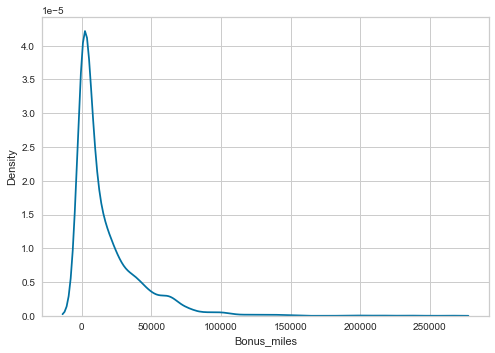

Bonus_trans


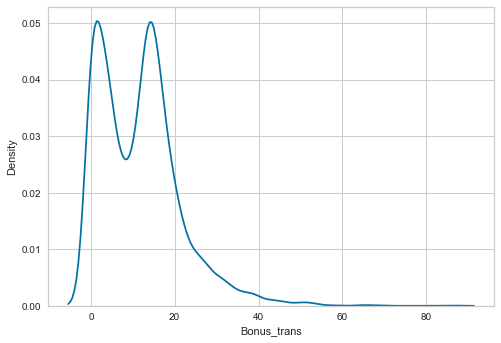

Flight_miles_12mo


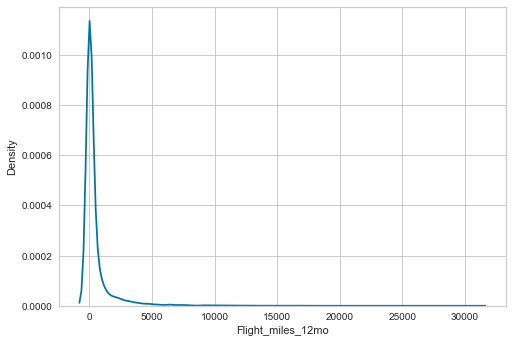

Flight_trans_12


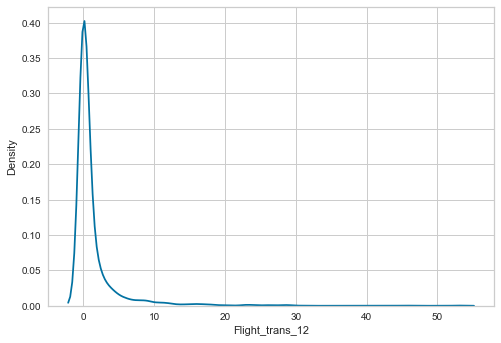

Days_since_enroll


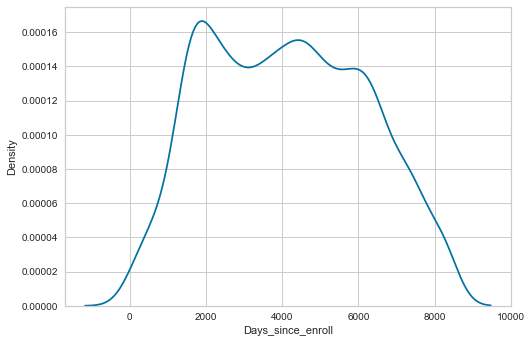

Award


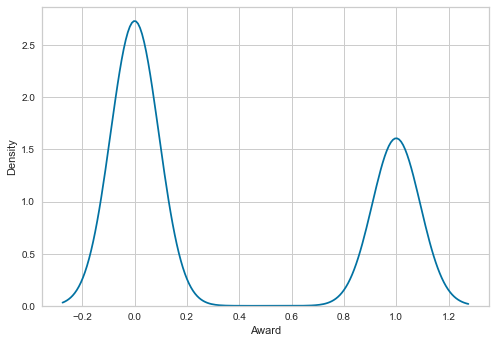

In [16]:
 # Kernel Density for every feature, singled out

for n in Airlines.columns:
    print(n)
    sns.kdeplot(Airlines[n])
    plt.show()

### Outliers Detection 

In [17]:
Airlines.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

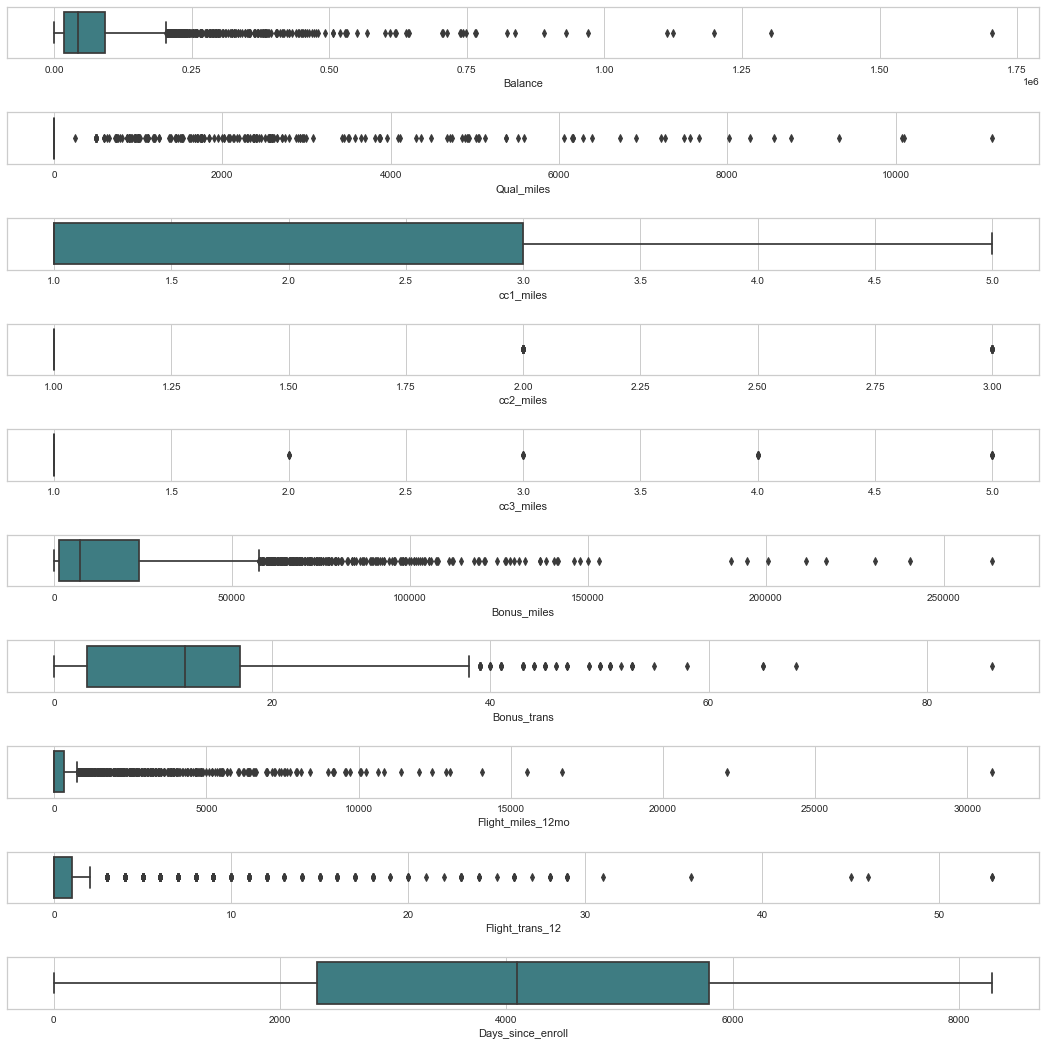

In [18]:
OTD = Airlines.copy()
fig, axes = plt.subplots(10,1,figsize = (15,15),sharex = False,sharey = False)
sns.boxplot(x = 'Balance',data = OTD, palette = 'crest', ax = axes[0])
sns.boxplot(x = 'Qual_miles',data = OTD, palette = 'crest', ax = axes[1])
sns.boxplot(x = 'cc1_miles',data = OTD, palette = 'crest', ax = axes[2])
sns.boxplot(x = 'cc2_miles',data = OTD, palette = 'crest', ax = axes[3])
sns.boxplot(x = 'cc3_miles',data = OTD, palette = 'crest', ax = axes[4])
sns.boxplot(x = 'Bonus_miles',data = OTD, palette = 'crest', ax = axes[5])
sns.boxplot(x = 'Bonus_trans',data = OTD, palette = 'crest', ax = axes[6])
sns.boxplot(x = 'Flight_miles_12mo',data = OTD, palette = 'crest', ax = axes[7])
sns.boxplot(x = 'Flight_trans_12',data = OTD, palette = 'crest', ax = axes[8])
sns.boxplot(x = 'Days_since_enroll',data = OTD, palette = 'crest', ax = axes[9])
plt.tight_layout(pad = 2.0)

<AxesSubplot:>

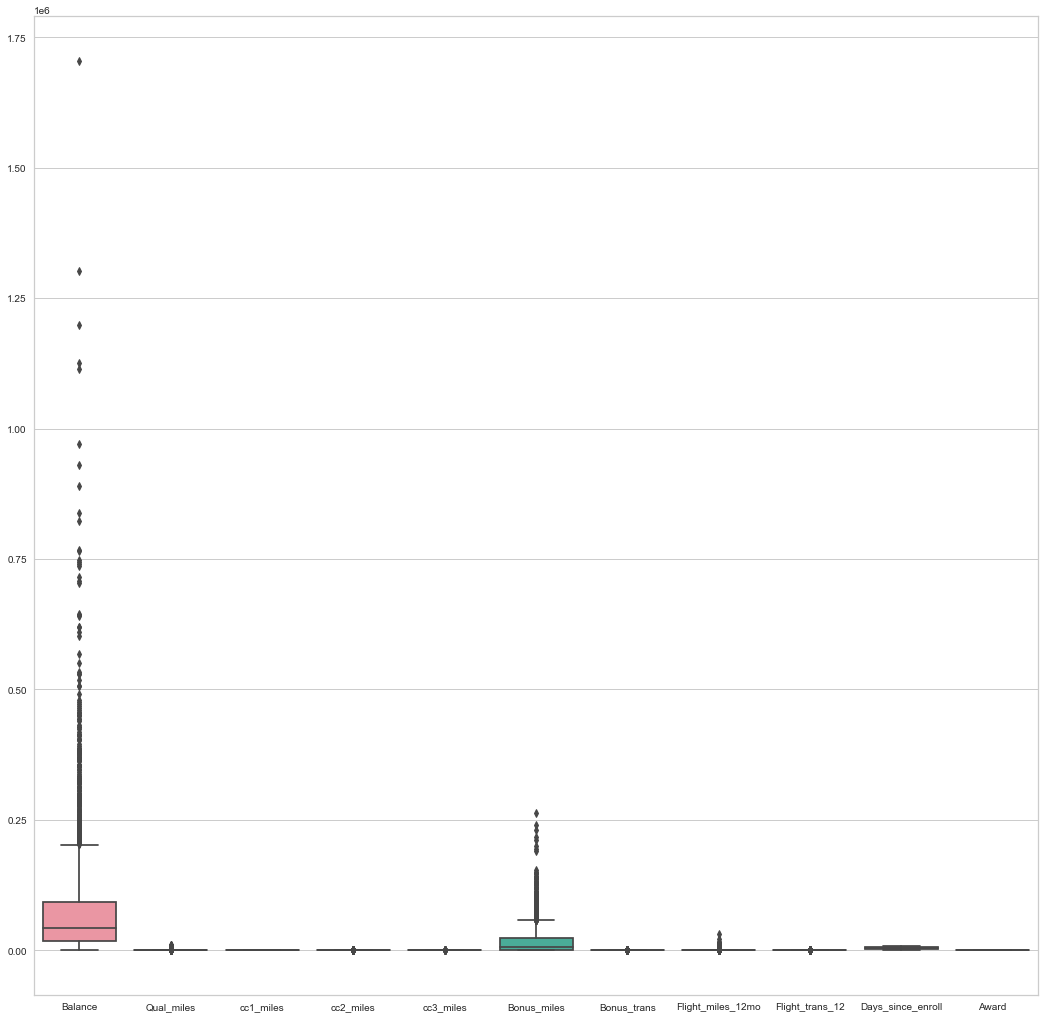

In [19]:
# Box plot for all feature in the same graph

plt.figure(figsize=(18,18))
sns.boxplot(data = Airlines)


#### Use sqrt() to see more clearly despite the outliers 

<AxesSubplot:>

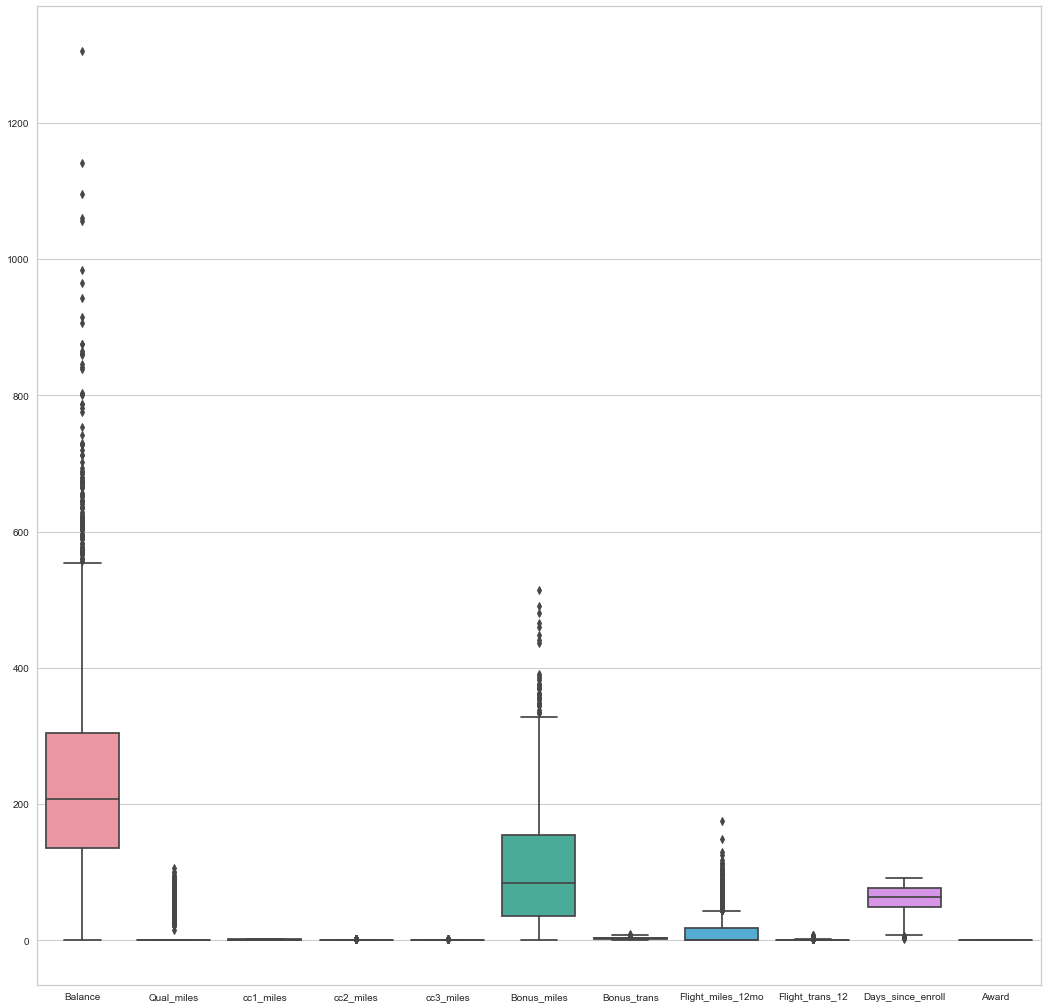

In [20]:
plt.figure(figsize=(18,18))
sns.boxplot(data = np.sqrt(Airlines))

# Visualization

In [21]:
countNotermdeposit = len(Airlines[Airlines.Award == 0])
counthavetermdeposit = len(Airlines[Airlines.Award == 1])
print("Percentage of Passenger who does'nt have Award :{:.2f}%".format((countNotermdeposit / (len(Airlines.Award))*100)))
print("Percentage of Passenger who have Award :{:.2f}%".format((counthavetermdeposit / (len(Airlines.Award))*100)))

Percentage of Passenger who does'nt have Award :62.97%
Percentage of Passenger who have Award :37.03%


Text(0.5, 1.0, 'Whether Passenger has a Award or Not')

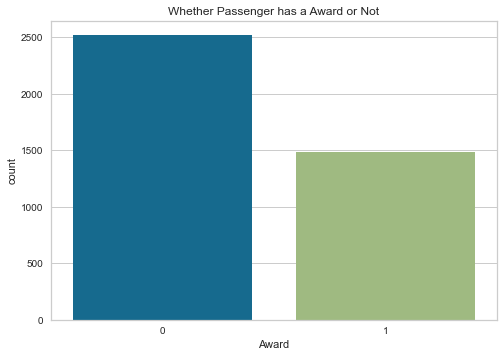

In [22]:
sns.countplot(x = 'Award', data = Airlines,
             order = Airlines['Award'].value_counts().index)
plt.xticks(fontsize = 10)
plt.title("Whether Passenger has a Award or Not")

####  Balance : Number of miles eligible for Award travel 

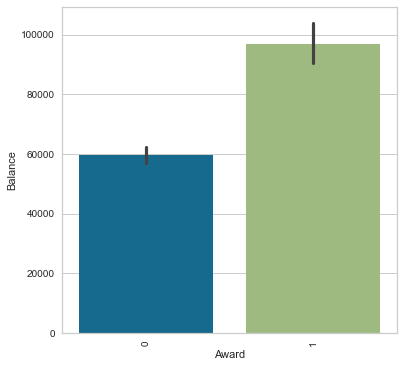

In [23]:
plt.figure(figsize = (6,6))
Balance = Airlines[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

#### Correlation 

In [24]:
corr_matrix = Airlines.corr()
corr_matrix["Balance"].sort_values(ascending = False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

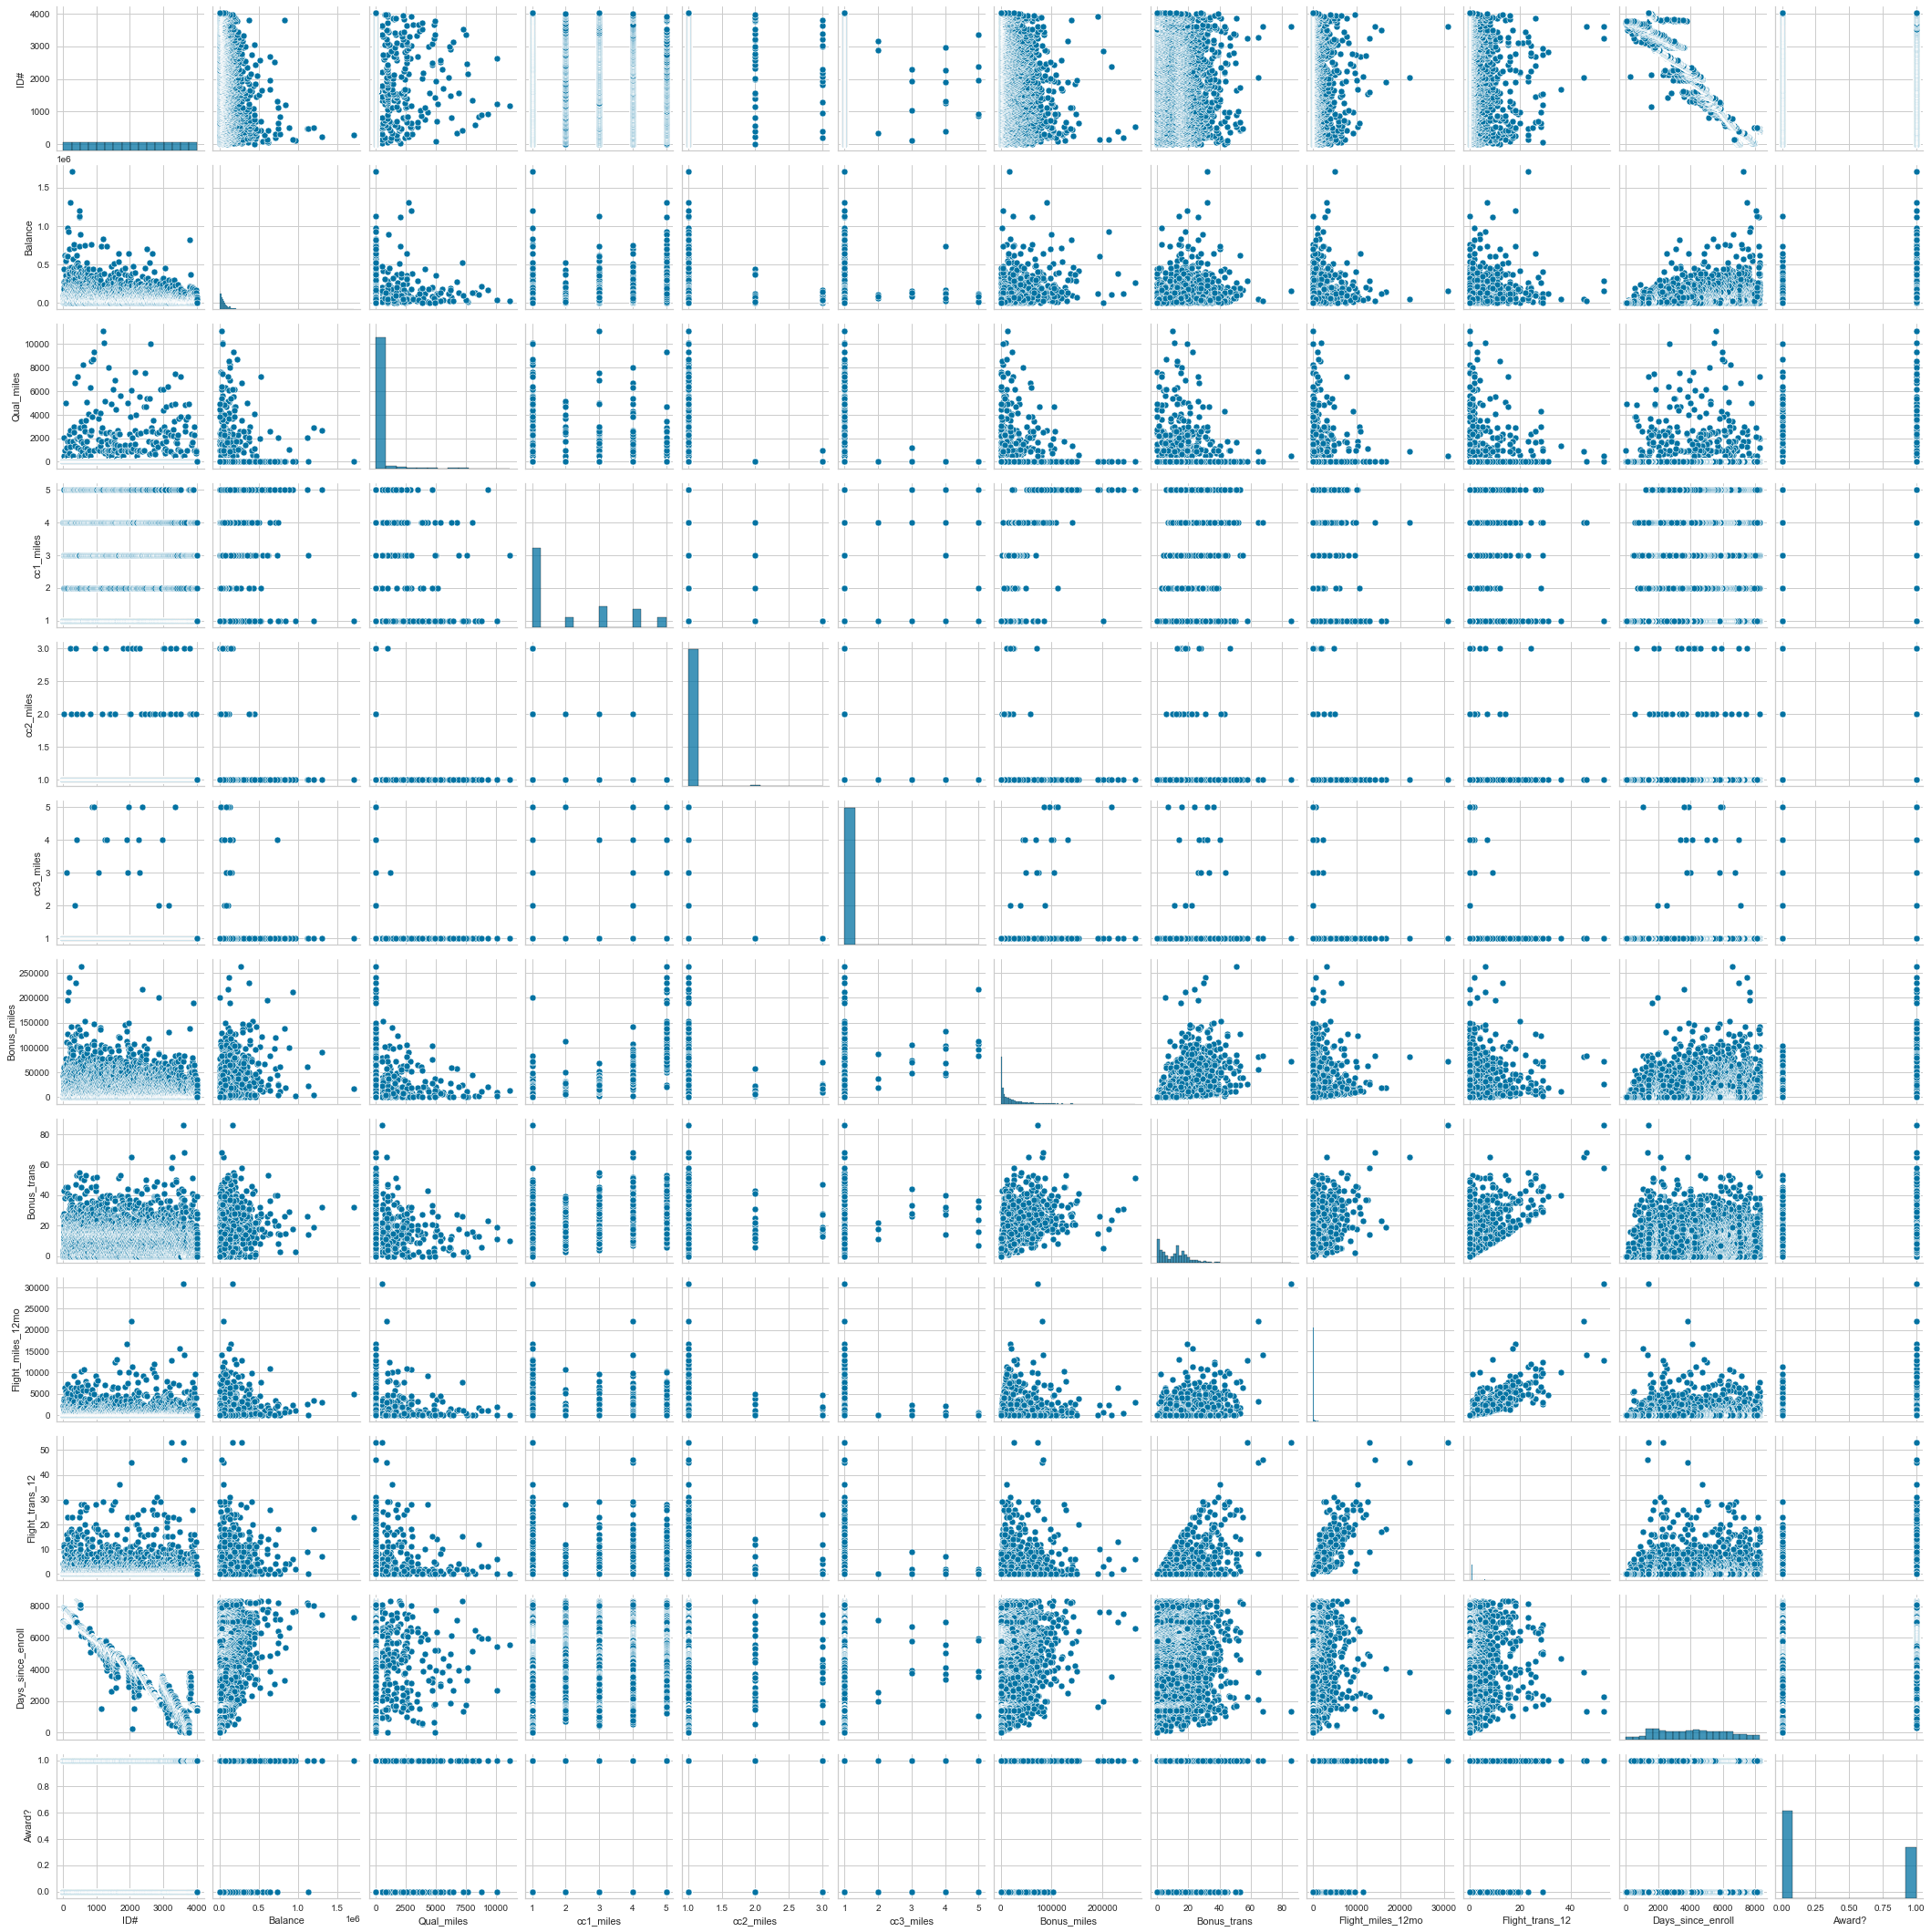

In [25]:
dataset = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
sns.pairplot(dataset)

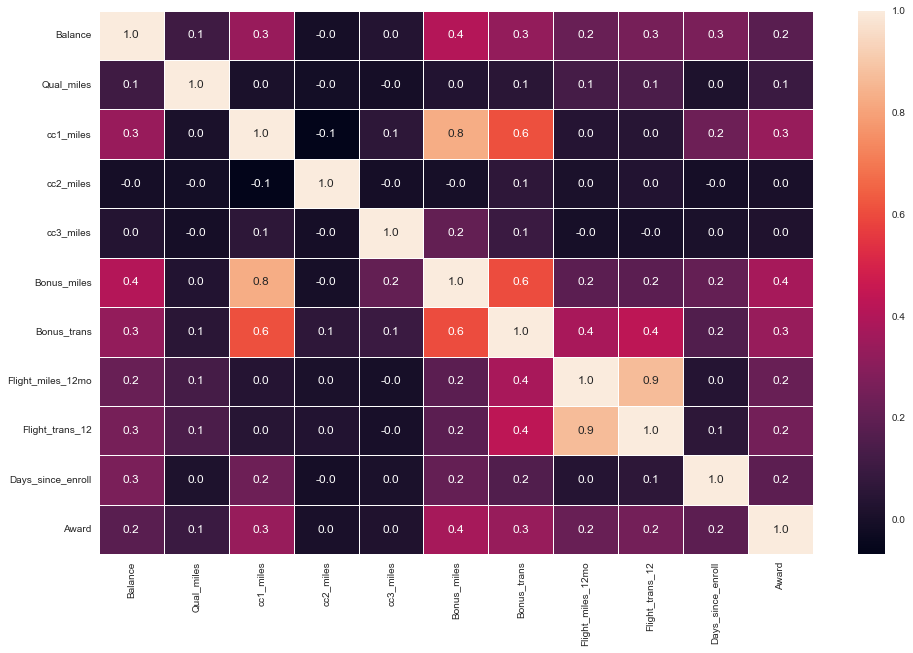

In [26]:
f , ax = plt.subplots(figsize = (16,10))
sns.heatmap(Airlines.corr(), annot = True, linewidths = 0.5, fmt = '0.1f', ax = ax)
plt.show()

#### Plotting Frequency flying bonuses vs. non-flight bonus Transaction

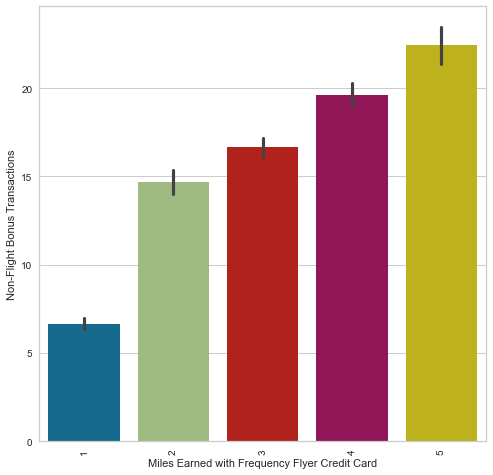

In [27]:
plt.figure(figsize = (8,8))
sorted_data = Airlines[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x = 'cc1_miles', y = 'Bonus_trans', data = sorted_data)
ax.set(xlabel = 'Miles Earned with Frequency Flyer Credit Card', ylabel = 'Non-Flight Bonus Transactions')
plt.xticks(rotation = 90)
plt.show()

## Standard Scaler 
### Feature Scaling.  

In [28]:
# Standardizing Data

StandScale = StandardScaler()
std_df = StandScale.fit_transform(Airlines)
std_df.shape

(3999, 11)

In [29]:
# Normalizing Data

minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(Airlines)
minmax_df.shape

(3999, 11)

# K-Means Clustering 

### Elbow Method

In [30]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             43989.000000  
1   2             35409.511452  
2   3             30899.246825  
3   4             27161.489060  
4   5             24545.217534  
5   6             21480.129074  
6   7             18891.668718  
7   8             17316.753604  
8   9             16043.093151  
9   10            14726.983323  
10  11            13705.137507  
11  12            12952.681094  
12  13            12429.139658  
13  14            11971.050798

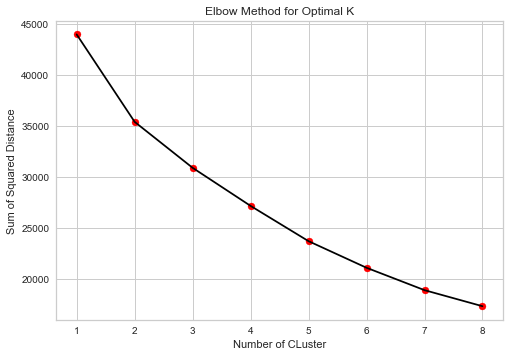

In [31]:
Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    KM = KMeans(n_clusters = k)
    KM = KM.fit(std_df)
    Sum_of_squared_distances.append(KM.inertia_)

plt.plot(K , Sum_of_squared_distances, color = 'black')
plt.scatter(K ,Sum_of_squared_distances ,color='red')
plt.xlabel('Number of CLuster')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal K')
plt.show()

# Silhouette Coefficient

In [32]:
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_inertia = []
s_scores = []

for n in n_clusters:
    KMEST = KMeans(n_clusters = n, init = 'k-means++').fit(std_df)
    clusters_inertia.append(KMEST.inertia_)
    silhouette_avg = silhouette_score(std_df, KMEST.labels_)
    s_scores.append(silhouette_avg)

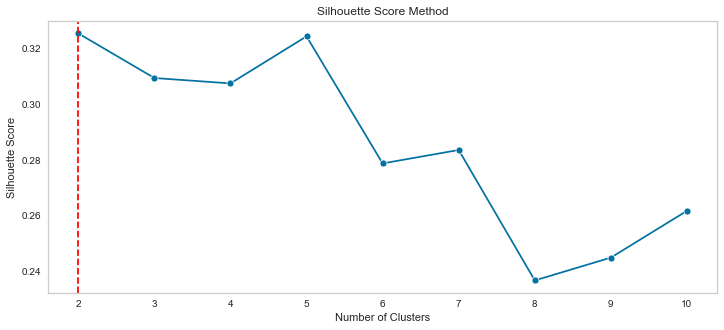

In [33]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot(n_clusters, s_scores, marker = 'o', ax = ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
ax.axvline(2, ls = "--", c = "red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


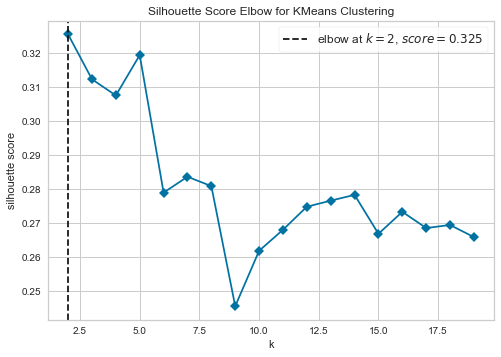

In [34]:
model = KMeans(random_state = 10, max_iter=500, init='k-means++')
visualizer = KElbowVisualizer(model, k = (2,20), metric = 'silhouette', timings = False)

print('Elbow Plot for Standard Scaler data')

visualizer.fit(std_df)
visualizer.poof()
plt.show()

In [35]:
clust_list = [2,3,4,5,6,7,8,9]

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters = n_clusters, random_state = 0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    silhouette_score1 = silhouette_score(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters, "The Average Silhouette Score is :", silhouette_score1)

For n_clusters = 2 The Average Silhouette Score is : 0.3256981835090824
For n_clusters = 3 The Average Silhouette Score is : 0.3121716765282414
For n_clusters = 4 The Average Silhouette Score is : 0.32563311512799126
For n_clusters = 5 The Average Silhouette Score is : 0.31819537664378844
For n_clusters = 6 The Average Silhouette Score is : 0.3338735662323181
For n_clusters = 7 The Average Silhouette Score is : 0.22085896619040385
For n_clusters = 8 The Average Silhouette Score is : 0.23657639934232003
For n_clusters = 9 The Average Silhouette Score is : 0.2984364654012059


For n_clusters = 2  The Average Silhouette Score is : 0.3256981835090824
For n_clusters = 3  The Average Silhouette Score is : 0.3121716765282414
For n_clusters = 4  The Average Silhouette Score is : 0.32563311512799126
For n_clusters = 5  The Average Silhouette Score is : 0.31819537664378844
For n_clusters = 6  The Average Silhouette Score is : 0.3338735662323181
For n_clusters = 7  The Average Silhouette Score is : 0.22085896619040385
For n_clusters = 8  The Average Silhouette Score is : 0.23657639934232003
For n_clusters = 9  The Average Silhouette Score is : 0.2984364654012059


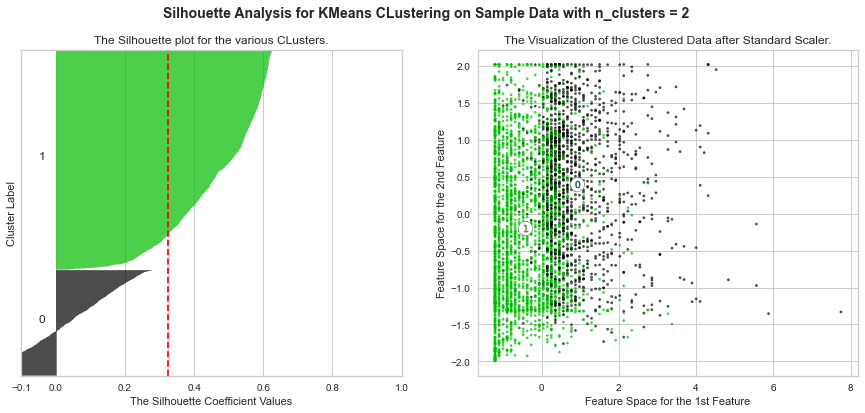

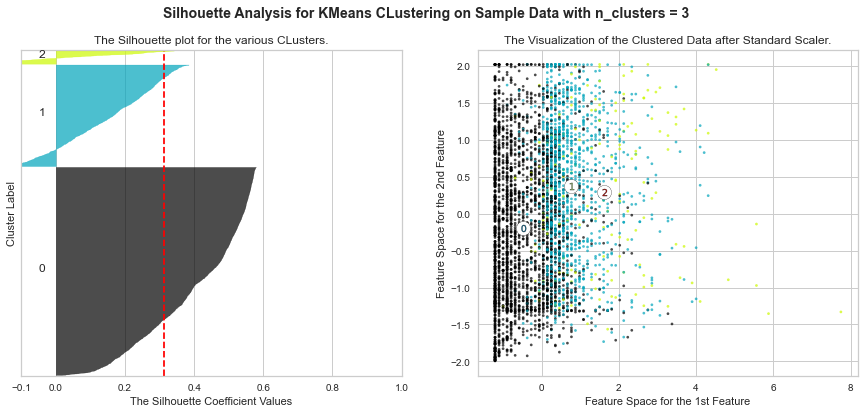

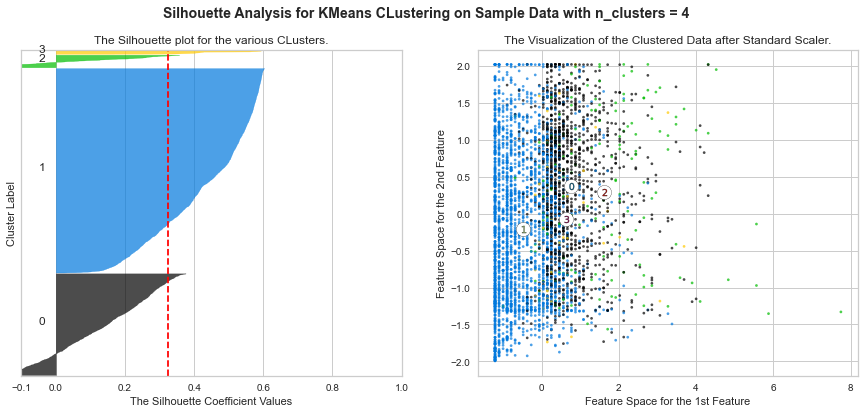

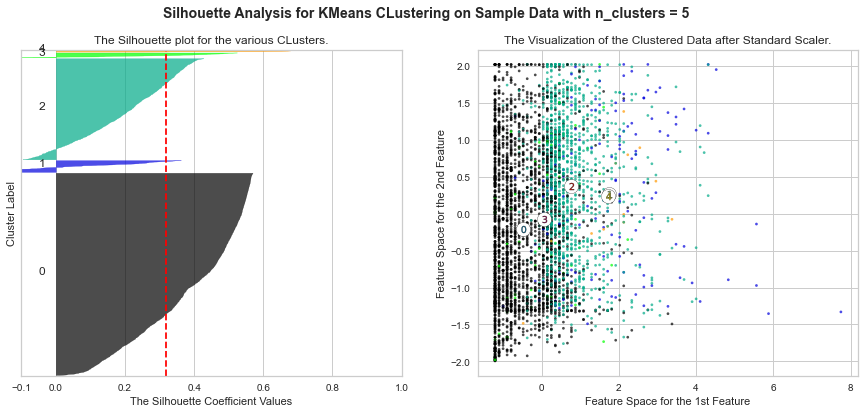

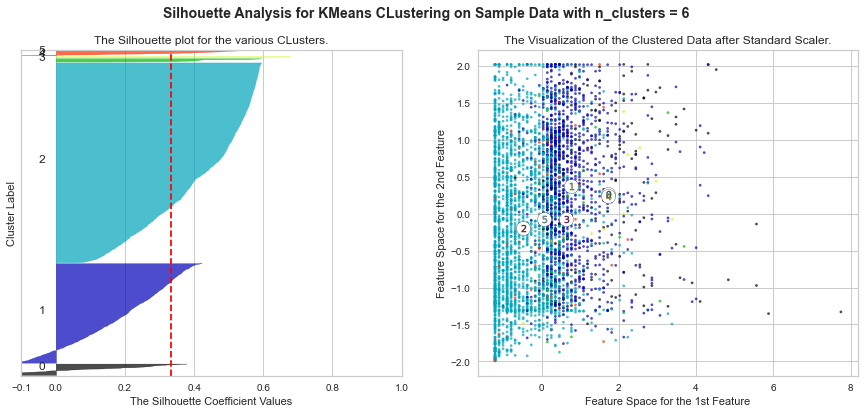

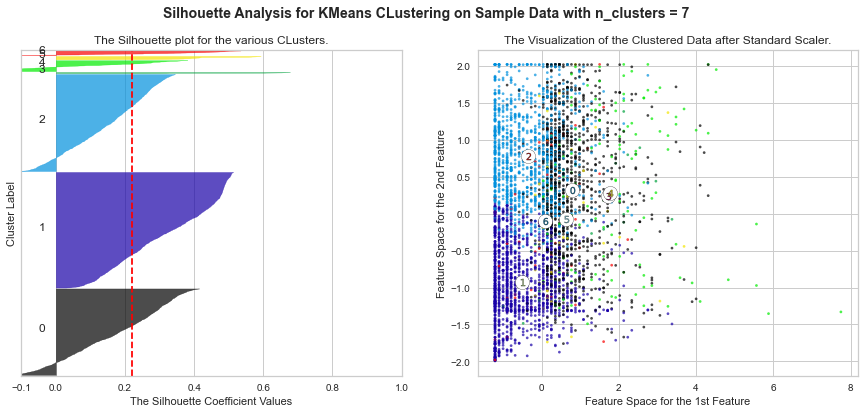

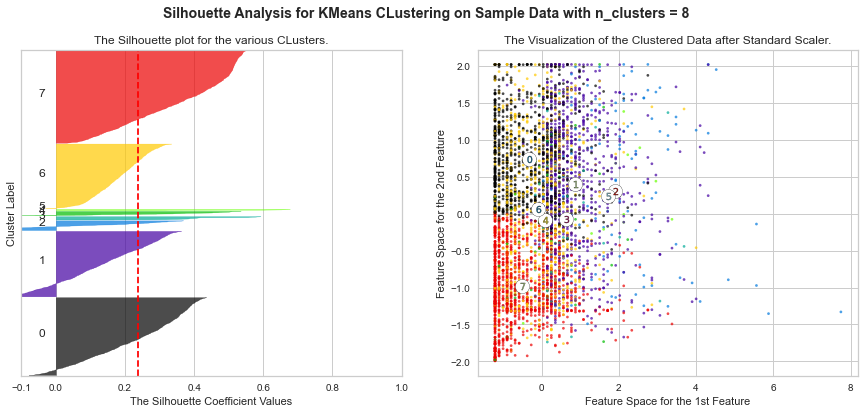

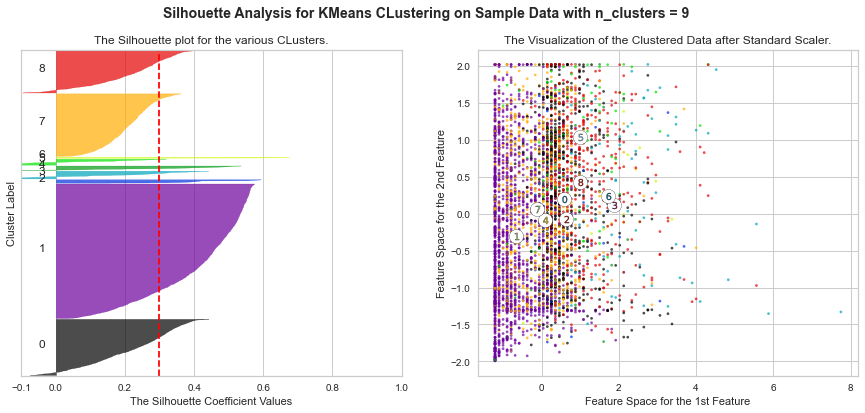

In [36]:
Range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in Range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,6)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters = n_clusters, random_state = 0)
    cluster_labels = clusterer.fit_predict(std_df)
    
    silhouette_avg = silhouette_score(std_df, cluster_labels)
    print("For n_clusters =", n_clusters, " The Average Silhouette Score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = CM.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor = color, edgecolor = color, alpha = 0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The Silhouette plot for the various CLusters.")
    ax1.set_xlabel("The Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    colors = CM.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:,9], marker = '.', s = 30, lw = 0,alpha = 0.7, c = colors, edgecolors = 'k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:,6], centers[:,9], marker = 'o', c = "White", alpha = 1, s = 200, edgecolors = 'k')
    
    for i , c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker = '$%d$' % i, alpha = 1, s = 50, edgecolors = 'k')
        
    ax2.set_title("The Visualization of the Clustered Data after Standard Scaler.")
    ax2.set_xlabel("Feature Space for the 1st Feature")
    ax2.set_ylabel("Feature Space for the 2nd Feature")
    
    plt.suptitle(("Silhouette Analysis for KMeans CLustering on Sample Data with n_clusters = %d" % n_clusters),
                    fontsize = 14, fontweight = 'bold')
    
plt.show()

### Build KMeans Cluster and Standard Scaler 

In [37]:
model_kmeans = KMeans(n_clusters = 6, random_state = 0, init = 'k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [38]:
y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2])

In [39]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [40]:
model_kmeans.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [41]:
model_kmeans.inertia_

21089.97362892965

In [42]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['KMeans_Label'] = model_kmeans.labels_

In [43]:
df.groupby('KMeans_Label').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                     mean           mean         mean      mean      mean   
KMeans_Label                                                                
0             1743.867133  188155.664336  464.573427   2.244755  1.000000   
1             1599.831858  117176.916331  58.446500    3.720837  1.000000   
2             2233.860465  43882.372895   43.558140    1.229751  1.000000   
3             2269.372093  68876.581395   23.255814    1.139535  2.348837   
4             1664.866667  138061.400000  78.800000    3.466667  1.000000   
5             2057.295082  119660.491803  5351.065574  2.000000  1.000000   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
KMeans_Label                                                         
0             1.000000  32995.580420  27.979021   5739.692308        
1             1.001609  39485.872084  18.811746   346.617860         
2             1.000401  4644.210104   6.852847    199.160385         
3             1.000000  14689.837209  17.534884   582.627907         
4             4.066667  93927.866667  28.066667   506.666667         
5             1.000000  18683.475410  12.229508   963.639344         

             Flight_trans_12 Days_since_enroll     Award  
                        mean              mean      mean  
KMeans_Label                                              
0             16.552448       4679.251748       0.797203  
1             1.032180        4887.485921       0.649236  
2             0.621091        3706.378508       0.200882  
3             2.209302        3968.930233       0.395349  
4             1.600000        4613.866667       0.533333  
5             2.868852        3971.491803       0.557377

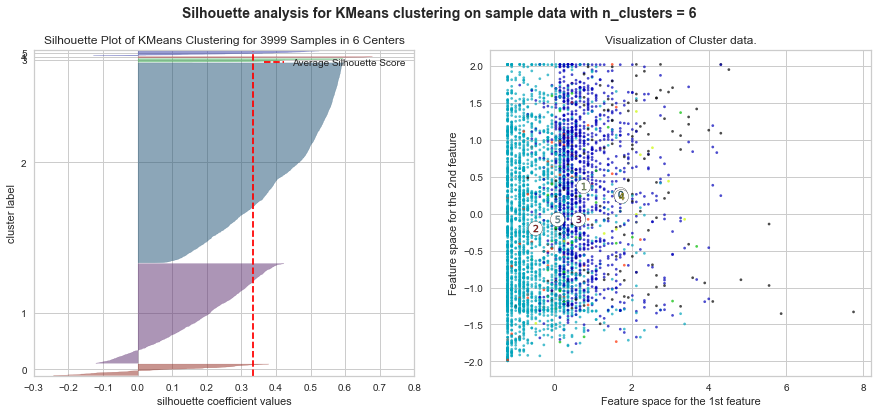

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey = False)
fig.set_size_inches(15,6)

Sil_Visualizer1 = SilhouetteVisualizer(model_kmeans, ax = ax1, 
                                       colors = ['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
Sil_Visualizer1.fit(std_df)

# Showning the actual clusters formed

Color1 = CM.nipy_spectral(model_kmeans.labels_.astype(float)/6)
ax2.scatter(std_df[:,6],std_df[:,9],marker='.', s=30, lw=0, alpha=0.7, c=Color1,edgecolor ='k')

#Labeling the CLusters
Center1 = model_kmeans.cluster_centers_

ax2.scatter(Center1[:,6], Center1[:,9],marker='o',c="White",alpha=1, s=200,edgecolors='k')

for i, c in enumerate(Center1):
    ax2.scatter(c[6], c[9],marker='$%d$' % i, alpha=1,s=50,edgecolor ='k')
    
ax2.set_title(label="Visualization of Cluster data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

Sil_Visualizer1.show()
plt.show()


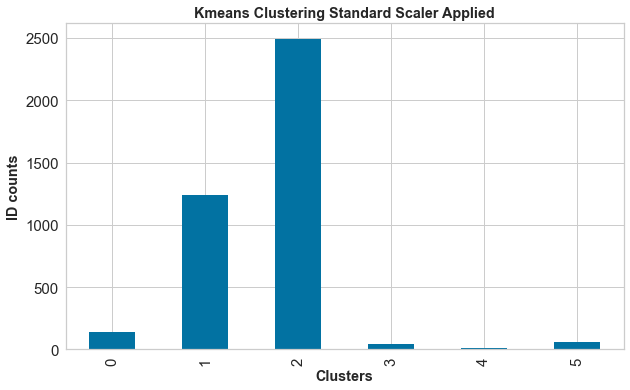

In [45]:
# Plotting Barplot using Groupby Method to get Visualize how many row no. in each Cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['KMeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


### Elbow Method and Silhouette Score on MinMaxScaler Applied Data 

In [46]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             1830.793213   
1   2             823.675698    
2   3             625.168488    
3   4             436.708858    
4   5             348.943428    
5   6             315.314685    
6   7             287.876701    
7   8             263.048920    
8   9             243.915566    
9   10            226.109320    
10  11            215.314657    
11  12            206.465473    
12  13            195.155271    
13  14            189.630553

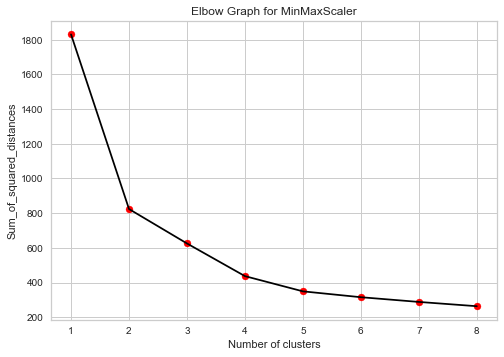

In [47]:
Sum_of_squared_distances=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot K values range vs Sum_of_squared_distances to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),Sum_of_squared_distances,color = 'black')
plt.scatter(range(1,9),Sum_of_squared_distances,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

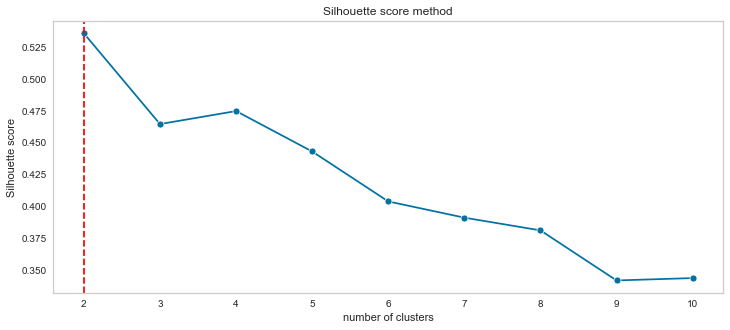

In [48]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KMEST = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KMEST.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KMEST.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


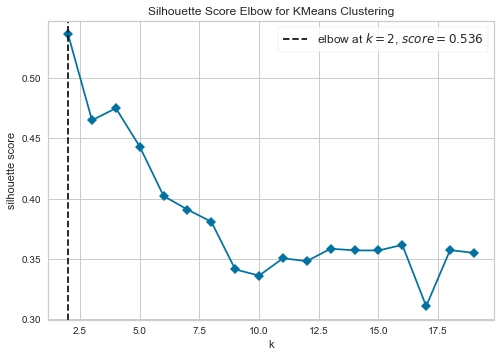

In [49]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [50]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    silhouette_score1= silhouette_score(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.4744941579482721
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.38865859989228385
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38030165896247936
For n_clusters = 9 The average silhouette_score is : 0.3842538055607832


For n_clusters = 2 The average silhouette_score is : 0.535930510919477


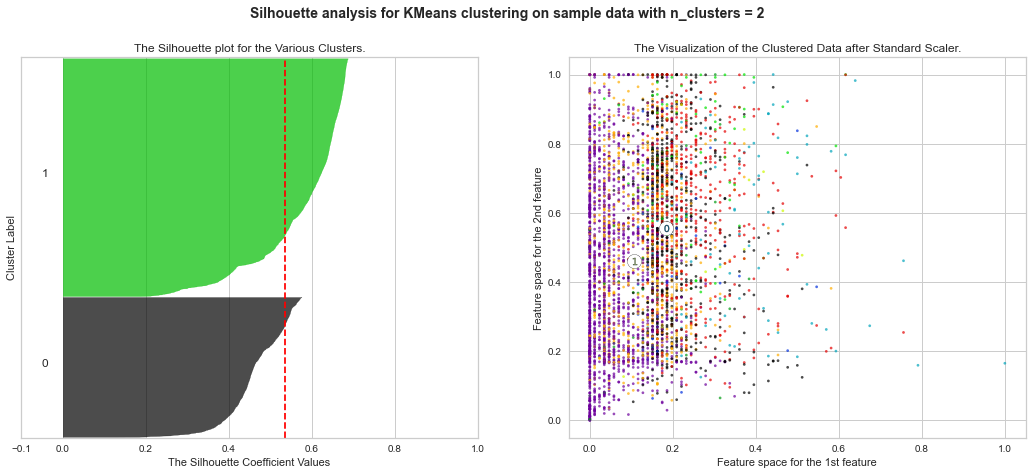

For n_clusters = 3 The average silhouette_score is : 0.46484529388583046


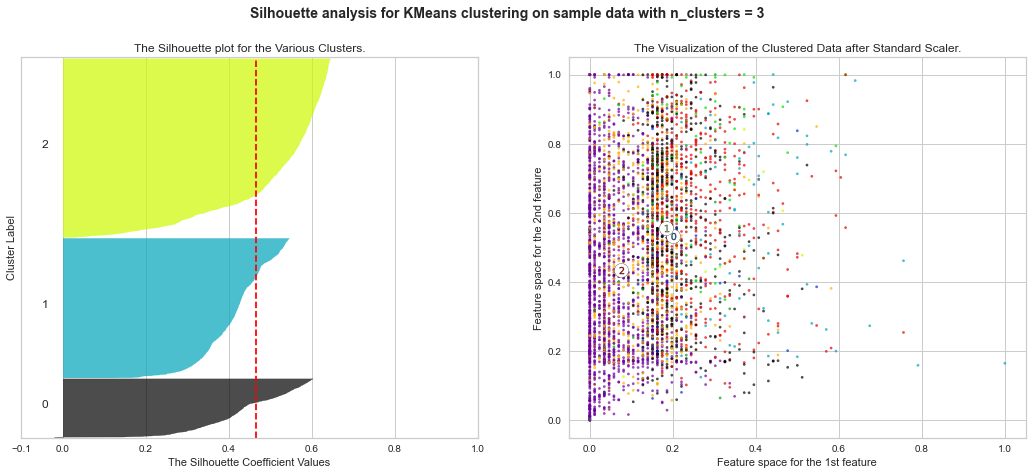

For n_clusters = 4 The average silhouette_score is : 0.47483765255961


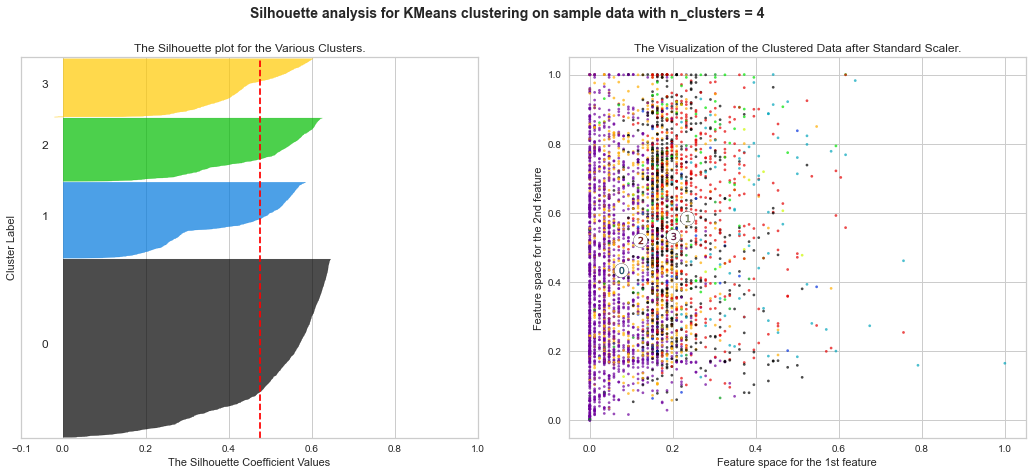

For n_clusters = 5 The average silhouette_score is : 0.4430672072796034


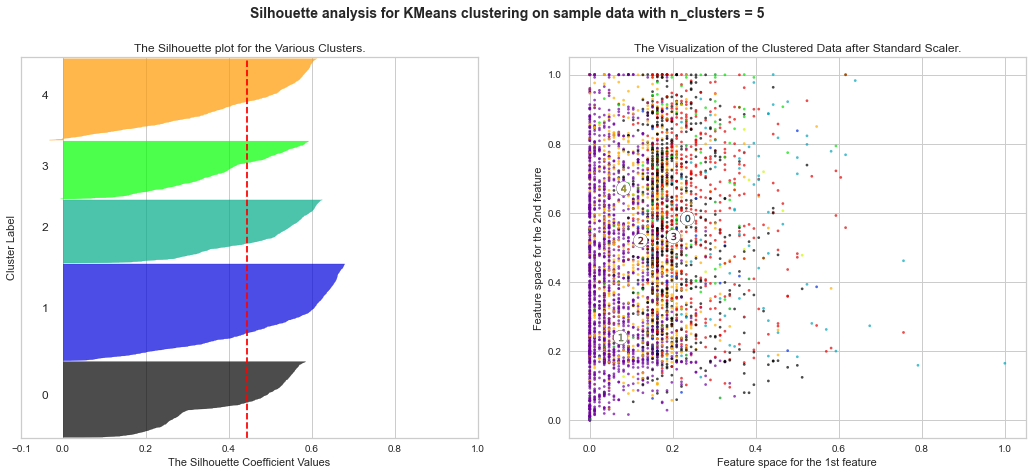

For n_clusters = 6 The average silhouette_score is : 0.4021621004641961


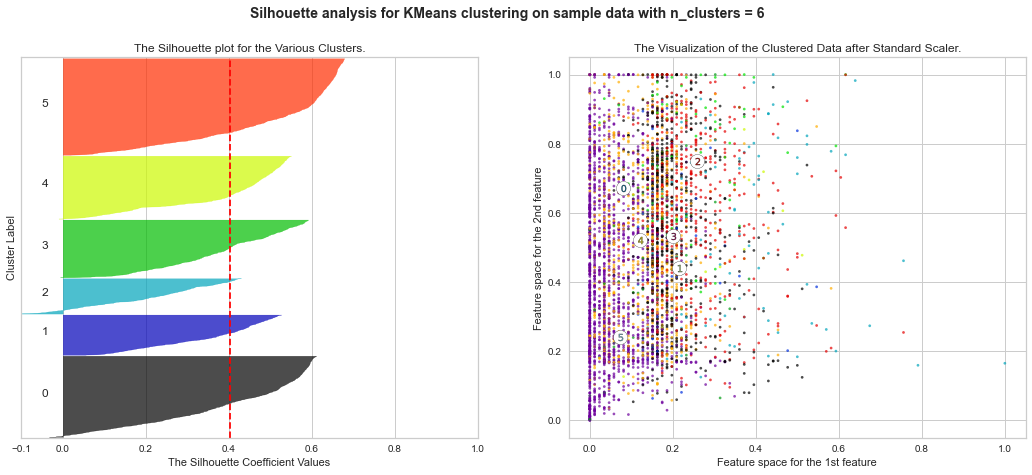

For n_clusters = 7 The average silhouette_score is : 0.3909380562842146


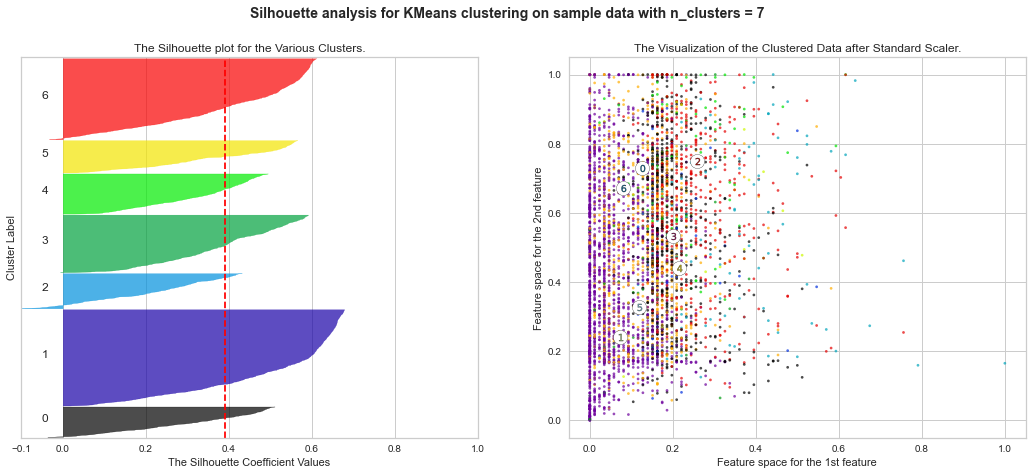

For n_clusters = 8 The average silhouette_score is : 0.38083842933577705


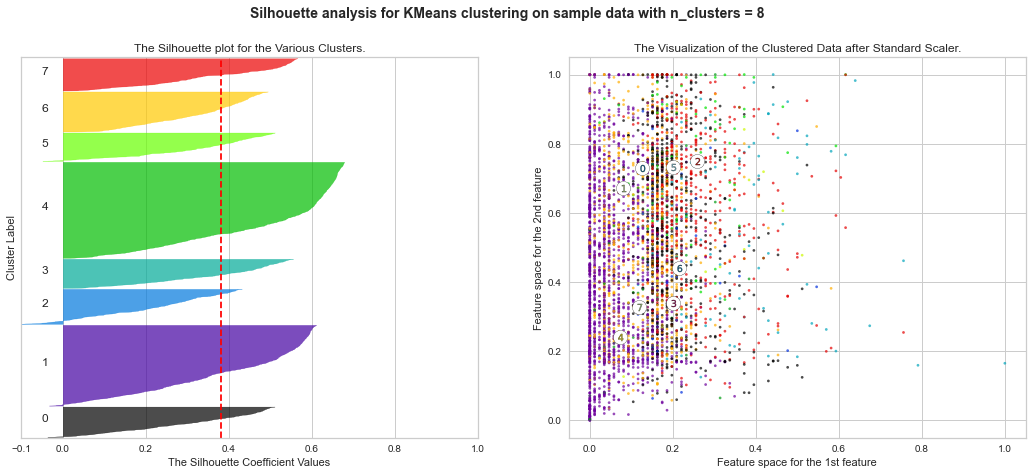

For n_clusters = 9 The average silhouette_score is : 0.3414078154201448


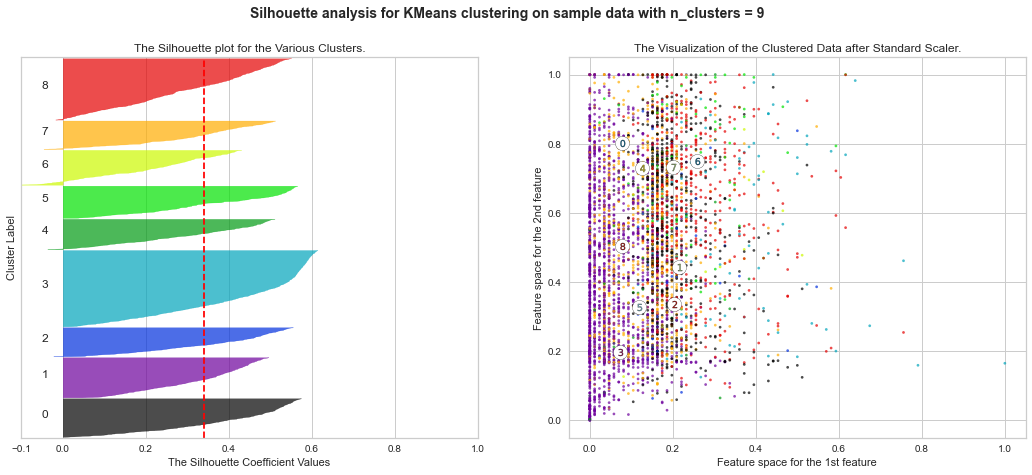

In [51]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters = n_clusters, random_state =10)
    cluster_labels = clusterer.fit_predict(minmax_df)
    
    silhouette_avg = silhouette_score(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = CM.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The Silhouette plot for the Various Clusters.")
    ax1.set_xlabel("The Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Plot showing the actual clusters formed
    color = CM.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The Visualization of the Clustered Data after Standard Scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    

### Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset 

In [52]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3999,)

In [53]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [54]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [55]:
model_kmeans.cluster_centers_

array([[5.69280197e-02, 2.15461508e-02, 4.15428764e-01, 7.76502363e-03,
        4.55773126e-03, 1.09621005e-01, 1.83518364e-01, 2.78255837e-02,
        4.90489598e-02, 5.57398375e-01, 1.00000000e+00],
       [3.50812450e-02, 7.85813260e-03, 1.76330421e-01, 6.94996029e-03,
        2.18427323e-03, 3.87875269e-02, 1.06313612e-01, 7.34309944e-03,
        1.23113582e-02, 4.60411394e-01, 5.49560397e-15]])

In [56]:
model_kmeans.inertia_

823.6756984125207

In [57]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['KMeans_Label'] = model_kmeans.labels_

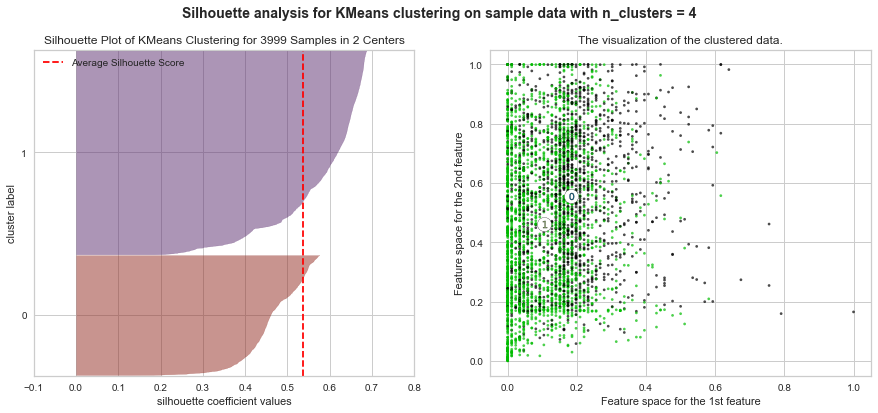

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)

colors1 = CM.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(minmax_df[:, 6], minmax_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

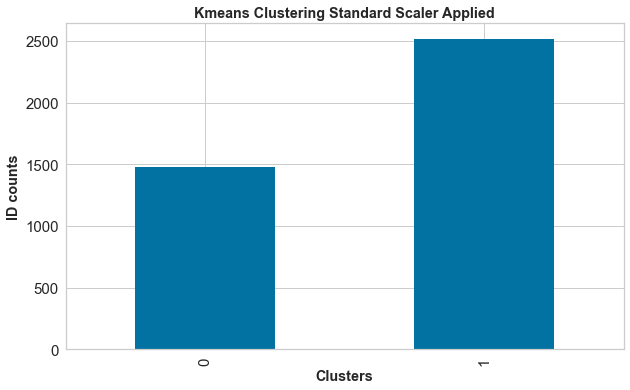

In [59]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['KMeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [60]:
# Group data by Clusters (K=2)
df.groupby('KMeans_Label').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                     mean          mean        mean      mean      mean   
KMeans_Label                                                              
0             1745.592843  97053.051317  240.196489  2.661715  1.01553    
1             2173.169182  59807.839555  87.602462   1.705322  1.01390    

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
KMeans_Label                                                         
0             1.018231  28905.414585  15.782579   857.501013         
1             1.008737  10227.689039  9.142971    226.292295         

             Flight_trans_12 Days_since_enroll Award  
                        mean              mean  mean  
KMeans_Label                                          
0             2.599595        4625.062120       1.0   
1             0.652502        3820.652105       0.0

## Hierarchical Clustering Algorithm 

### Dendogram on MinMaxScaler Applied on Dataset

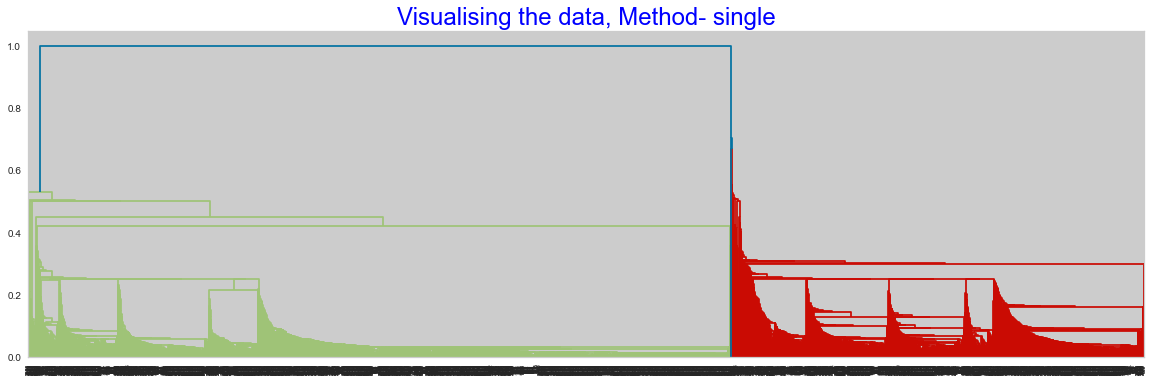

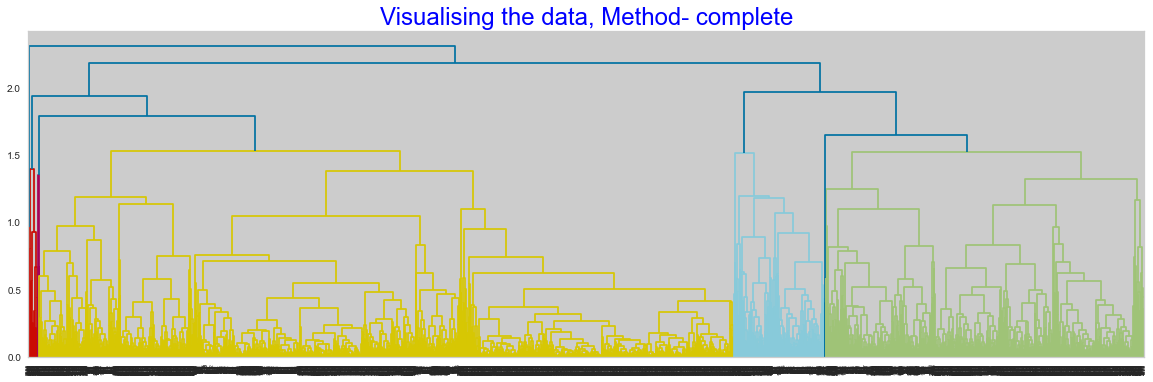

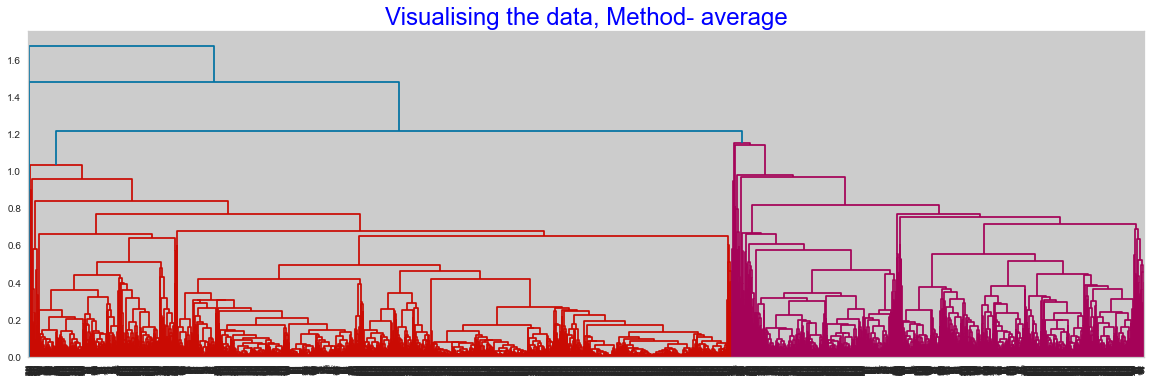

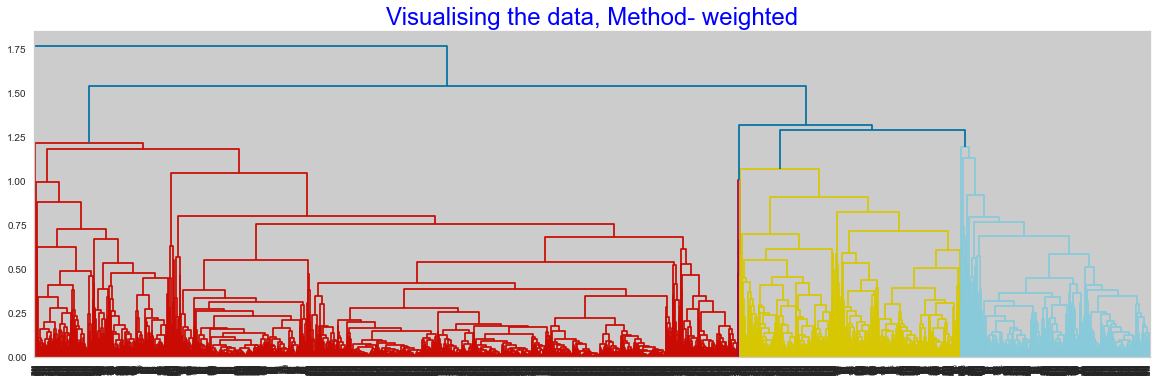

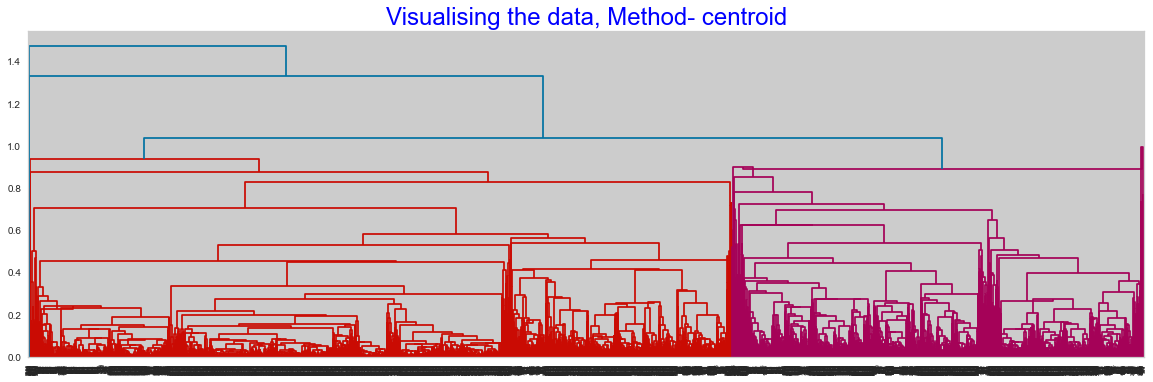

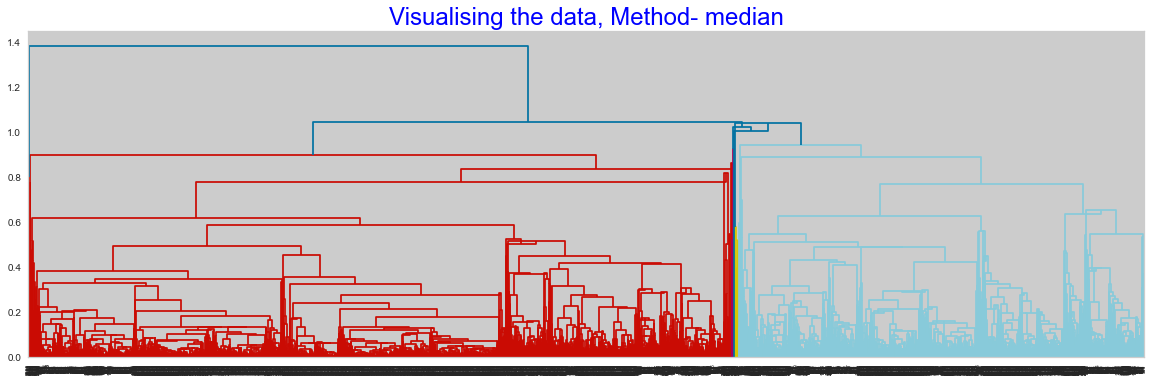

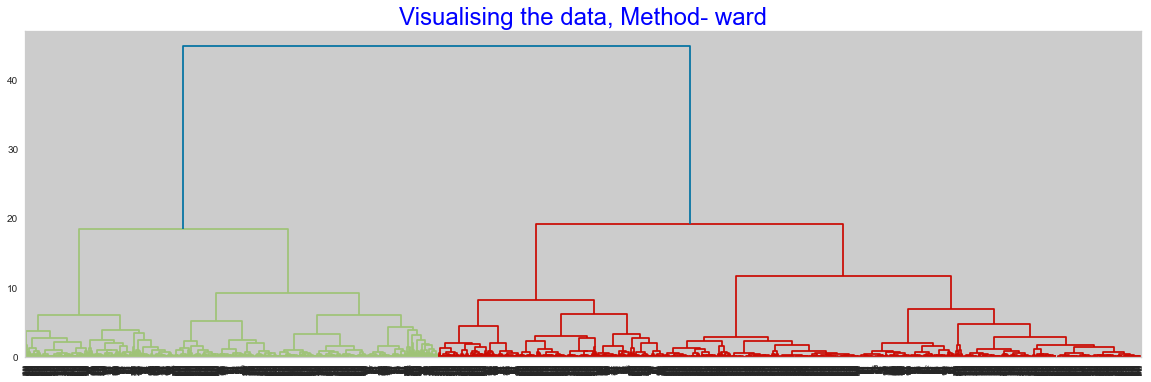

In [61]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [62]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = silhouette_score(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

### Dendrogram on Standard Scaler Applied on Data 

In [63]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = silhouette_score(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

## PCA

### Running PCA of standardized data.

In [64]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state = 10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [65]:
# eigenvalues..

print(pca_std.singular_values_)

[114.62320365  83.12946351  64.9433498   63.53081811  61.96651495
  60.39644071  56.79935294  49.81594442  37.95522507]


In [66]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.86764604 15.70962673  9.58793945  9.17539578  8.72911177  8.29236866
  7.33403008  5.64147473  3.27490761]


In [67]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.86764604, 45.57727277, 55.16521222, 64.340608  , 73.06971976,
       81.36208842, 88.69611851, 94.33759324, 97.61250085])

## Silhouette Score method for PCA Standard Scaled Data 

In [68]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average Silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average Silhouette_score with linkage- ward : 0.19974848194356454
For n_clusters = 2 The average Silhouette_score with linkage- complete : 0.8108872970217894
For n_clusters = 2 The average Silhouette_score with linkage- average : 0.8108872970217894
For n_clusters = 2 The average Silhouette_score with linkage- single : 0.7383486934304828

For n_clusters = 3 The average Silhouette_score with linkage- ward : 0.21117381561703924
For n_clusters = 3 The average Silhouette_score with linkage- complete : 0.7784326687701912
For n_clusters = 3 The average Silhouette_score with linkage- average : 0.7858157031588873
For n_clusters = 3 The average Silhouette_score with linkage- single : 0.7380711786432603

For n_clusters = 4 The average Silhouette_score with linkage- ward : 0.2151215868832399
For n_clusters = 4 The average Silhouette_score with linkage- complete : 0.6685647808748002
For n_clusters = 4 The average Silhouette_score with linkage- average : 0.7754755890058266
For

## Run Hierarchical Clustering.(Agglomerative Clustering) 

In [69]:
#df1 = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
#df1.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
#df1['Hierarchical_Labels'] = agg_clustering.labels_

In [70]:
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [71]:
# Cluster numbers
agg_clustering.n_clusters_

10

In [72]:
# Clustering Score

(silhouette_score(pca_std_df, agg_clustering.labels_)*100).round(3)

28.498

###  Put Cluster lables into original dataset And analysis of the same

In [73]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   KMeans_Label  Hierarchical_labels  
0  1             0                    
1  1             0                    
2  1             0                    
3  1             0                    
4  0             7

In [74]:
df.groupby('Hierarchical_labels').agg(['mean'])

ID        Balance   Qual_miles cc1_miles  \
                            mean           mean         mean      mean   
Hierarchical_labels                                                      
0                    2353.579074  35544.690319   1.894768     1.071557   
1                    1711.144699  106691.116046  9.482808     3.249284   
2                    1883.119205  59183.817881   34.030905    2.355408   
3                    2269.372093  68876.581395   23.255814    1.139535   
4                    1742.444444  129951.388889  65.666667    3.388889   
5                    1736.480769  145767.807692  483.692308   2.576923   
6                    2013.723077  107778.330769  3553.684615  1.884615   
7                    1254.977528  123897.501873  59.329588    4.464419   
8                    2282.514793  82556.378698   117.325444   1.035503   
9                    772.150943   626516.283019  202.452830   3.698113   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_labels                                                 
0                    1.000000  1.000000  2690.832231   5.926037     
1                    1.000000  1.000000  27320.199140  16.641834    
2                    1.000000  1.000000  18106.241722  11.897351    
3                    2.348837  1.000000  14689.837209  17.534884    
4                    1.000000  3.722222  86259.888889  26.222222    
5                    1.000000  1.000000  41204.115385  35.596154    
6                    1.000000  1.000000  17001.907692  11.276923    
7                    1.000000  1.000000  66245.951311  24.352060    
8                    1.000000  1.000000  8169.911243   11.946746    
9                    1.000000  1.000000  56755.566038  20.415094    

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll  \
                                 mean            mean              mean   
Hierarchical_labels                                                       
0                    98.142514         0.332532        3484.751654        
1                    185.707736        0.547278        4667.399713        
2                    183.070640        0.584989        4365.253863        
3                    582.627907        2.209302        3968.930233        
4                    422.222222        1.333333        4488.777778        
5                    8882.211538       23.326923       4557.961538        
6                    764.107692        2.384615        4091.761538        
7                    1014.719101       3.112360        5494.797753        
8                    2757.295858       8.047337        3710.431953        
9                    948.886792        3.679245        6559.113208        

                        Award KMeans_Label  
                         mean         mean  
Hierarchical_labels                         
0                    0.008419  0.991581     
1                    0.000000  1.000000     
2                    1.000000  0.000000     
3                    0.395349  0.604651     
4                    0.500000  0.500000     
5                    0.865385  0.134615     
6                    0.530769  0.469231     
7                    0.988764  0.011236     
8                    0.680473  0.319527     
9                    0.792453  0.207547

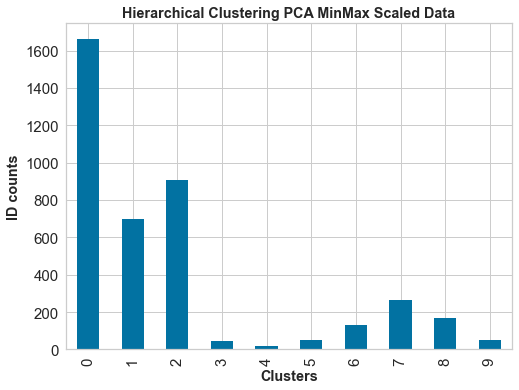

In [75]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Running PCA of MinMaxscalar data. 

In [76]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [77]:
# eigenvalues..

print(pca_minmax.singular_values_)

[32.61670755 20.38332523 14.95110164  6.55157753]


In [78]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[58.10867135 22.69398556 12.20975906  2.34451208]


### Silhouette Score method for PCA MinMax Scaled Data 

In [79]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = silhouette_score(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5570574742349588
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4506642023138529
For n_clusters = 2 The average silhouette_score with linkage- average : 0.474703385149702
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5570574742349588

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.466844286139677
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5527446133470323
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545574774683488
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5558068847998191

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.46056391656488954
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.50953081804769
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979760029410685
For n_cl

### Run Hierarchical Clustering.(Agglomerative Clustering) 

In [80]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [81]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [82]:
# Clustering Score

(silhouette_score(pca_minmax_df, agg_clustering.labels_)*100).round(3)

55.706

### Put Cluster lables into original dataset And analysis of the same 

In [83]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   KMeans_Label  Hierarchical_labels  
0  1             0                    
1  1             0                    
2  1             0                    
3  1             0                    
4  0             1

In [84]:
df.groupby('Hierarchical_labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles  \
                            mean          mean        mean      mean   
Hierarchical_labels                                                    
0                    2173.169182  59807.839555  87.602462   1.705322   
1                    1745.592843  97053.051317  240.196489  2.661715   

                    cc2_miles cc3_miles   Bonus_miles Bonus_trans  \
                         mean      mean          mean        mean   
Hierarchical_labels                                                 
0                    1.01390   1.008737  10227.689039  9.142971     
1                    1.01553   1.018231  28905.414585  15.782579    

                    Flight_miles_12mo Flight_trans_12 Days_since_enroll Award  \
                                 mean            mean              mean  mean   
Hierarchical_labels                                                             
0                    226.292295        0.652502        3820.652105       0.0    
1                    857.501013        2.599595        4625.062120       1.0    

                    KMeans_Label  
                            mean  
Hierarchical_labels               
0                    1.0          
1                    0.0

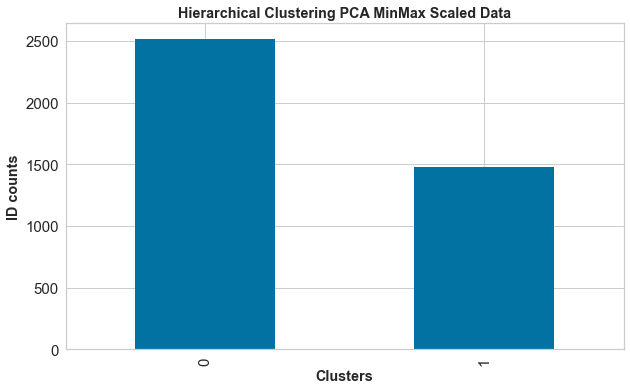

In [85]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## DBSCAN - (Density Based Spatial Clustering of Applications with Noise) 
### DBSCAN of Standard Scaled Data

In [86]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # Epsilon Value
min_samples = np.arange(3,23) 
DBSCAN_params = list(product(eps_values, min_samples))

In [87]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A Heatplot below shows how many clusters were Genareated by the Algorithm for the respective parameters combinations.


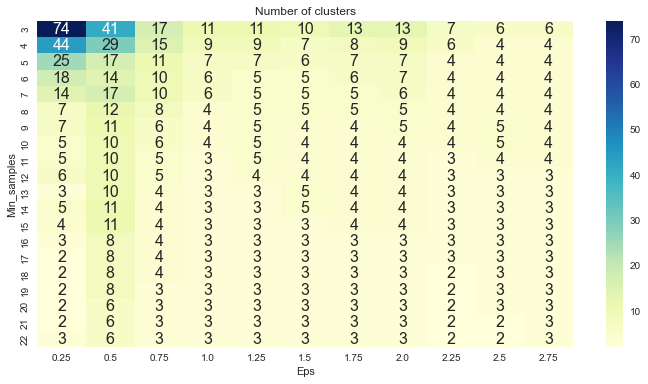

In [88]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(TMP, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A Heatplot below shows how many clusters were Genareated by the Algorithm for the respective parameters combinations.')
plt.show()

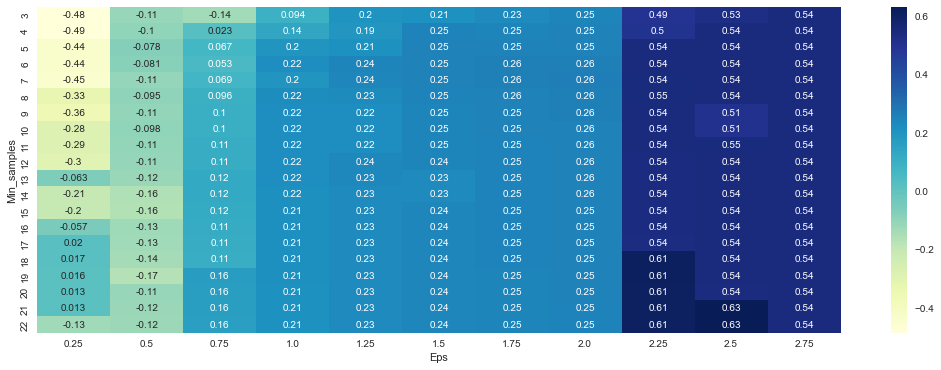

In [89]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(TMP, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [90]:
Epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


silhouette_score_avg = []
max_value = [0,0,0,0]

for i in range(len(Epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =Epsilon[i]).fit(std_df)
        
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        silhouette_avg = silhouette_score(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(Epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        silhouette_score_avg.append(silhouette_avg)
        
print("Epsilon=", max_value[0], "\nMin_sample=", max_value[1],"\nNumber of clusters=", max_value[2],
          "\nAverage silhouette score= %.4f" % max_value[3])


Epsilon= 2.5 
Min_sample= 21 
Number of clusters= 1 
Average silhouette score= 0.6319


#### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values 

In [91]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [92]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   KMeans_Label  Hierarchical_labels  DBSCAN_labels  
0  1             0                    0              
1  1             0                    0              
2  1             0                    0              
3  1             0                    0              
4  0             1                    0

In [94]:
df.groupby('DBSCAN_labels').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                      mean           mean         mean      mean      mean   
DBSCAN_labels                                                                
-1             1708.947115  211990.889423  1522.576923  2.509615  1.278846   
 0             2031.601688  66008.336587   68.482722    2.034819  1.000000   

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_labels                                                         
-1             1.235577  45335.081731  24.754808   3276.389423        
 0             1.000000  15598.138486  10.880243   305.532577         

              Flight_trans_12 Days_since_enroll     Award KMeans_Label  \
                         mean              mean      mean         mean   
DBSCAN_labels                                                            
-1             9.548077        4768.596154       0.687500  0.312500      
 0             0.925086        4082.893959       0.352941  0.647059      

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
-1             0.687500            
 0             0.352941

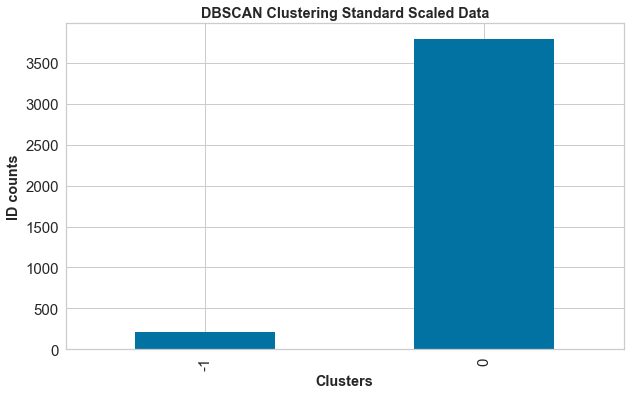

In [95]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### DBSCAN on MinMax Scaled Data 

In [96]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) 
min_samples = np.arange(3,23) 
DBSCAN_params = list(product(eps_values, min_samples))

In [97]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

A Heatplot below shows how many Clusters were Generated by the Algorithm for the respective Parameters combinations.


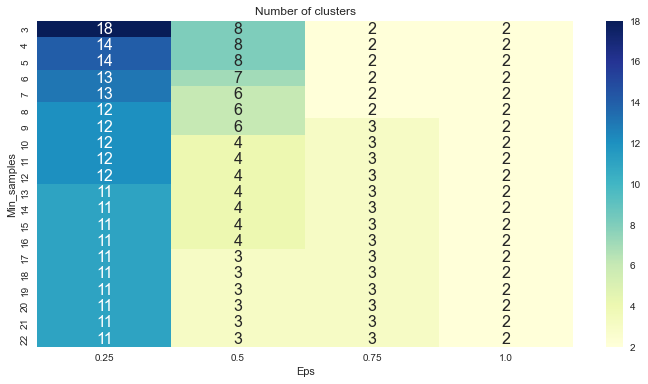

In [98]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(TMP, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A Heatplot below shows how many Clusters were Generated by the Algorithm for the respective Parameters combinations.')
plt.show()

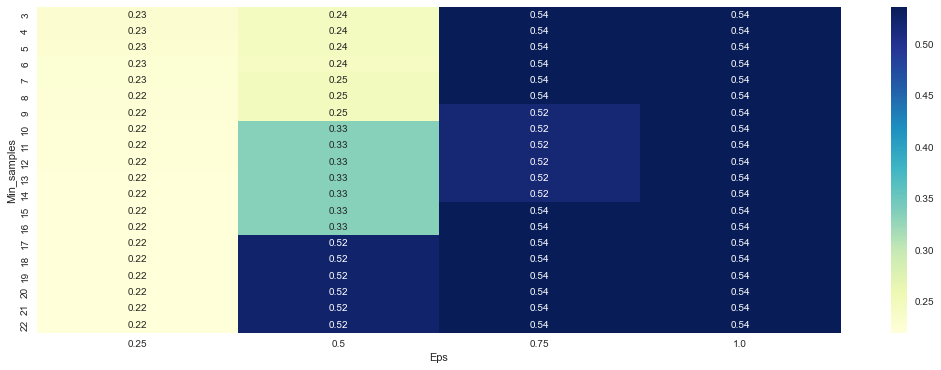

In [99]:
TMP = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
TMP['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(TMP, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [100]:
Epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(Epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =Epsilon[i]).fit(minmax_df)
        
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(Epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("Epsilon=", max_value[0], 
      "\nMin_sample=", max_value[1],
      "\nNumber of clusters=", max_value[2],
      "\nAverage silhouette score= %.4f" % max_value[3])

Epsilon= 1 
Min_sample= 11 
Number of clusters= 2 
Average silhouette score= 0.5359


In [101]:
Epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(Epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =Epsilon[i]).fit(minmax_df)
    
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(Epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)
        
print("Epsilon=", max_value[0], "\nMin_sample=", max_value[1],"\nNumber of clusters=", max_value[2],
      "\nAverage silhouette score= %.4f" % max_value[3])

Epsilon= 0.75 
Min_sample= 3 
Number of clusters= 2 
Average silhouette score= 0.5359


### Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [102]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [103]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [104]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1       

   KMeans_Label  Hierarchical_labels  DBSCAN_labels  
0  1             0                    0              
1  1             0                    0              
2  1             0                    0              
3  1             0                    0              
4  0             1                    1

In [105]:
df.groupby('DBSCAN_labels').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                      mean          mean        mean      mean      mean   
DBSCAN_labels                                                              
0              2173.169182  59807.839555  87.602462   1.705322  1.01390    
1              1745.592843  97053.051317  240.196489  2.661715  1.01553    

              cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                   mean          mean        mean              mean   
DBSCAN_labels                                                         
0              1.008737  10227.689039  9.142971    226.292295         
1              1.018231  28905.414585  15.782579   857.501013         

              Flight_trans_12 Days_since_enroll Award KMeans_Label  \
                         mean              mean  mean         mean   
DBSCAN_labels                                                        
0              0.652502        3820.652105       0.0   1.0           
1              2.599595        4625.062120       1.0   0.0           

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0              0.0                 
1              1.0

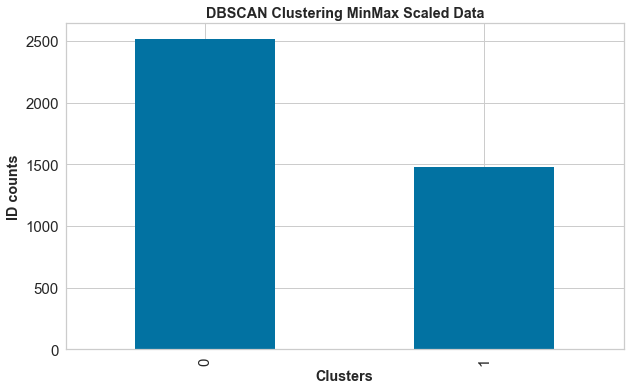

In [106]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [107]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [108]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
ID                   2173.169182   1745.592843 
Balance              59807.839555  97053.051317
Qual_miles           87.602462     240.196489  
cc1_miles            1.705322      2.661715    
cc2_miles            1.013900      1.015530    
cc3_miles            1.008737      1.018231    
Bonus_miles          10227.689039  28905.414585
Bonus_trans          9.142971      15.782579   
Flight_miles_12mo    226.292295    857.501013  
Flight_trans_12      0.652502      2.599595    
Days_since_enroll    3820.652105   4625.062120 
Award                0.000000      1.000000    
KMeans_Label         1.000000      0.000000    
Hierarchical_labels  0.000000      1.000000    
DBSCAN_labels        0.000000      1.000000

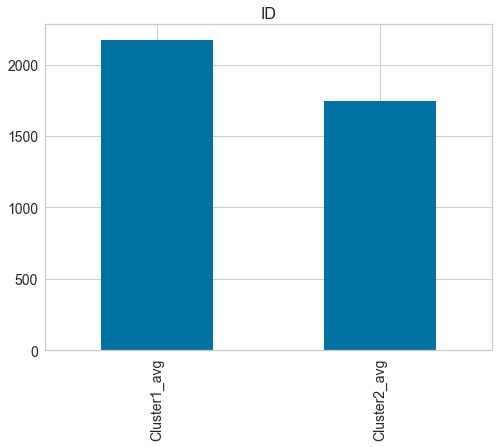

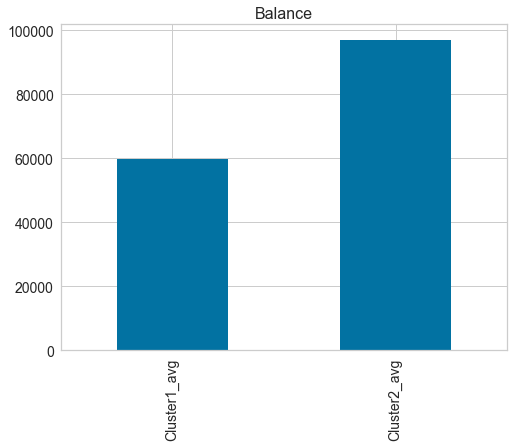

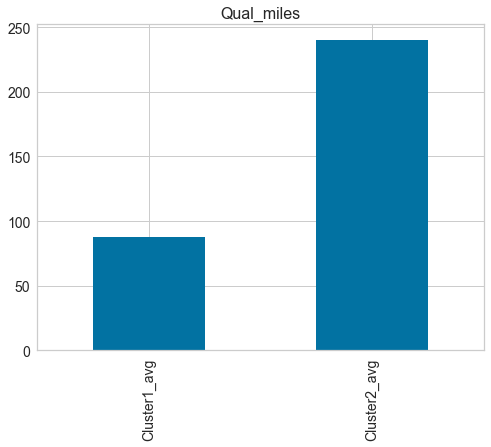

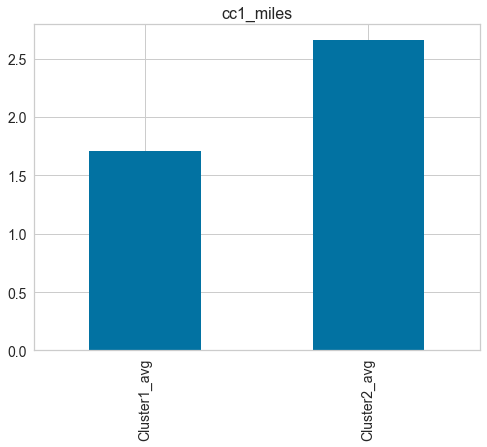

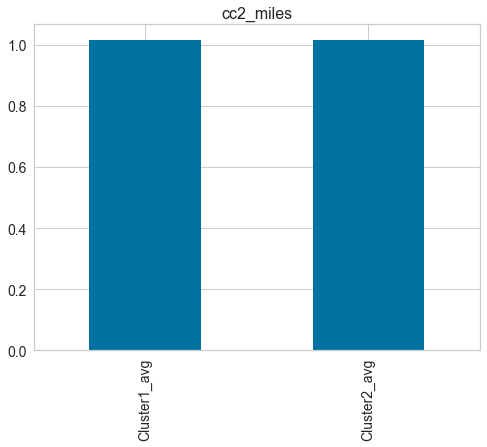

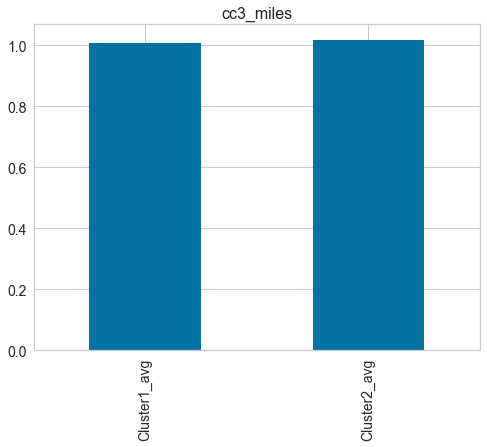

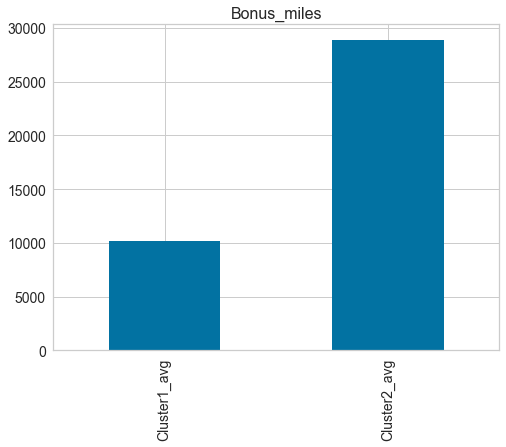

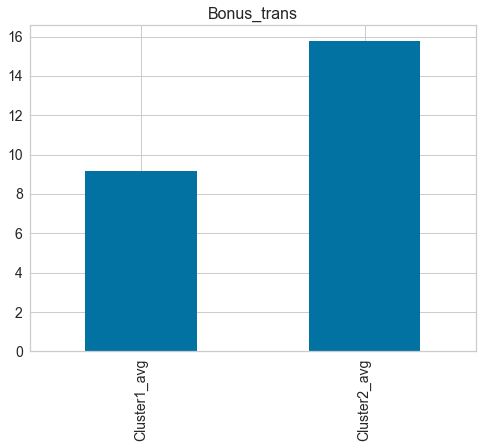

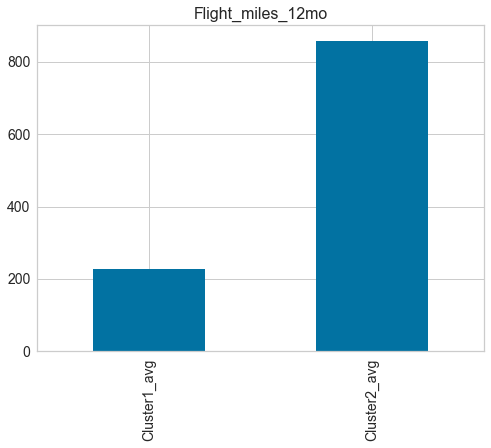

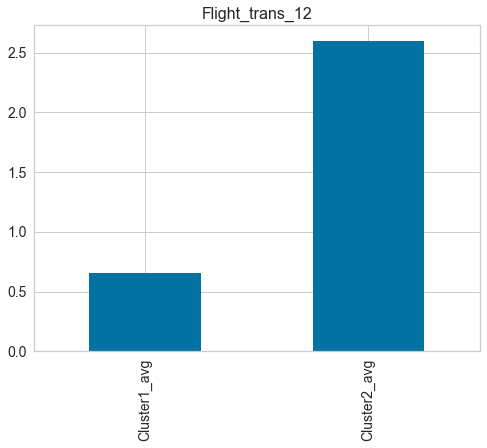

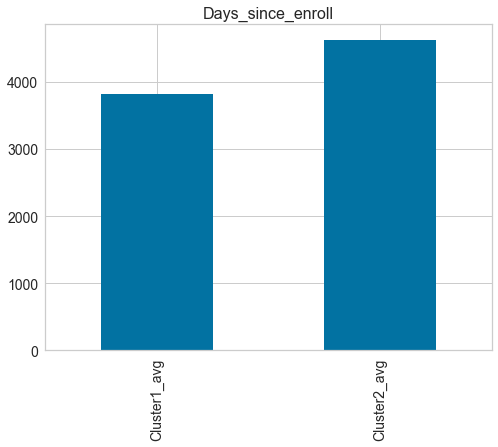

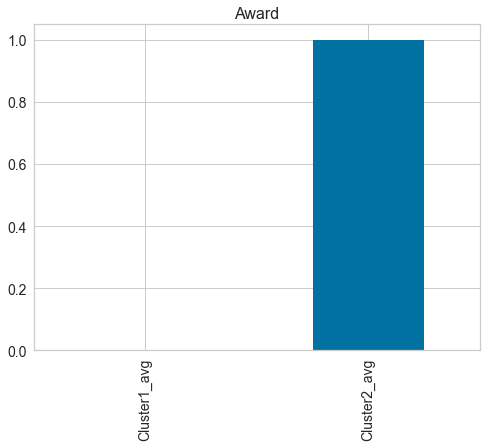

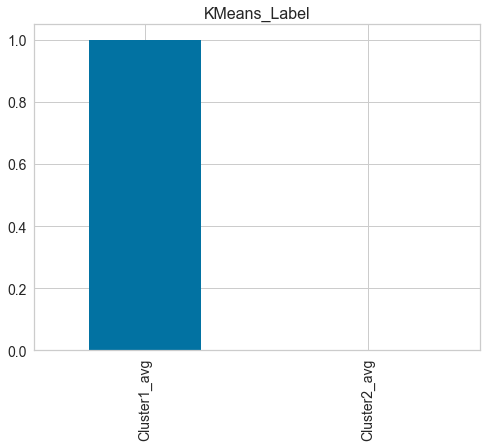

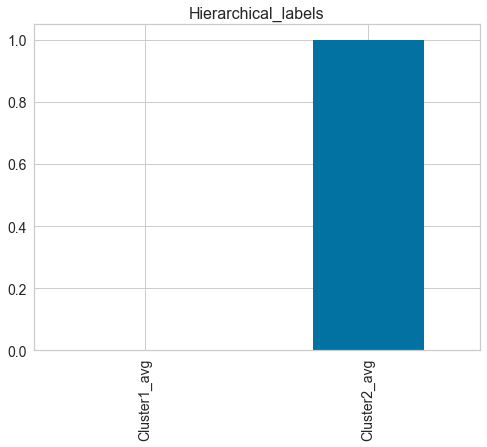

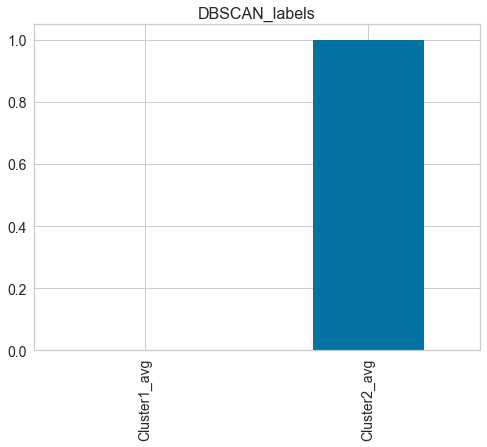

In [109]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()